## **Import Semua Packages/Library yang Digunakan**

Pada tahap ini, kami melakukan instalasi library yang dibutuhkan dan mengimpor berbagai package yang diperlukan untuk proses pemodelan dan analisis data.


In [1]:
# Instalasi library (jika belum terinstall)
!pip install -q tensorflowjs
!pip install -q split-folders

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, GlobalAveragePooling2D,
                                     Dense, Flatten, Dropout, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

# Visualisasi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Manipulasi dan Preprocessing Data
import numpy as np
import os
import zipfile
import shutil
import random
import splitfolders
from tqdm import tqdm
from PIL import Image

# Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix

# Konversi Model (Opsional)
import tensorflow.lite as lite
import tensorflowjs as tfjs

# Google Colab Tools
from google.colab import drive, files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


---
## **Insights**

### 1. Instalasi Library (Jika Belum Terinstall)
```python
!pip install -q tensorflowjs
!pip install -q split-folders
```

- **Apa yang dilakukan?**  
  Dua perintah di atas menggunakan `pip` untuk menginstal library yang mungkin belum terpasang di lingkungan runtime:
  - **`tensorflowjs`** digunakan untuk mengkonversi model TensorFlow/Keras menjadi format yang dapat dijalankan di browser.
  - **`split-folders`** membantu dalam membagi dataset ke dalam beberapa subset (misalnya, train, validation, test).

- **Mengapa penting?**  
  Memastikan semua dependensi sudah terinstall sangat penting agar seluruh pipeline, mulai dari pelatihan model hingga konversi dan deployment dapat berjalan tanpa hambatan.

- **Catatan:**  
  Flag `-q` (quiet) digunakan agar output instalasi tidak terlalu panjang dan hanya menampilkan informasi yang penting saja.

---

### 2. Suppress Warnings
```python
import warnings
warnings.filterwarnings("ignore")
```

- **Apa yang dilakukan?**  
  Bagian ini mengimpor modul `warnings` dan memanggil fungsi `filterwarnings("ignore")` untuk menonaktifkan tampilan pesan peringatan.

- **Mengapa penting?**  
  Pesan peringatan dari library seperti TensorFlow seringkali sangat banyak dan kadang membingungkan. Menonaktifkan peringatan membantu kami fokus pada output penting dan hasil eksekusi kode tanpa terganggu oleh notifikasi yang tidak esensial.

---

### 3. Import TensorFlow & Keras
```python
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, GlobalAveragePooling2D,
                                     Dense, Flatten, Dropout, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
```

- **Apa yang dilakukan?**  
  Bagian ini mengimpor:
  - **Inti TensorFlow** sebagai `tf` untuk akses ke berbagai fungsi low-level.  
  - Modul-modul dari **Keras** seperti model (baik `Sequential` maupun `Model` fungsional), berbagai tipe lapisan (convolutional, pooling, dense, dll.), dan utilitas pendukung (misalnya, `ImageDataGenerator` untuk augmentasi gambar, fungsi konversi label, callbacks untuk pengoptimalan pelatihan, dan optimizer Adam).
  - **`VGG16` dari tensorflow.keras.applications** yang merupakan model pra-latih dan akan digunakan untuk transfer learning.

- **Mengapa penting?**  
  Ini adalah fondasi untuk membangun dan melatih model deep learning. Setiap impor berperan untuk membuat model, mengelola data, dan mengontrol proses pelatihan secara efisien.

---

### 4. Import Library untuk Visualisasi
```python
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
```

- **Apa yang dilakukan?**  
  Bagian ini mengimpor:
  - **Matplotlib** sebagai `plt` untuk membuat grafik dan visualisasi gambar.
  - **Matplotlib.image** sebagai `mpimg` untuk memuat gambar.
  - **Seaborn** sebagai `sns` untuk membuat visualisasi yang lebih menarik dengan styling yang lebih baik.

- **Mengapa penting?**  
  Visualisasi sangat berguna untuk menganalisis data, mengecek hasil augmentasi gambar, dan memonitor performa model melalui grafik (seperti kurva loss dan akurasi). Seaborn membantu menghasilkan grafik yang lebih bersih dan informatif.

---

### 5. Import Library untuk Manipulasi dan Preprocessing Data
```python
import numpy as np
import os
import zipfile
import shutil
import random
import splitfolders
from tqdm import tqdm
from PIL import Image
```

- **Apa yang dilakukan?**  
  - **`numpy`** (`np`) digunakan untuk manipulasi array numerik.
  - **`os`** mengelola operasi sistem dan navigasi direktori.
  - **`zipfile`** dan **`shutil`** berguna untuk manajemen file, seperti ekstraksi arsip dan pemindahan file.
  - **`random`** untuk memilih sampel secara acak (misalnya, mengambil beberapa gambar dari setiap kelas).
  - **`splitfolders`** membantu membagi dataset ke dalam subset (misalnya, train/val/test).
  - **`tqdm`** memberikan progress bar yang interaktif terutama ketika iterasi berlangsung lama.
  - **`PIL` (`Pillow`)** digunakan untuk operasi pengolahan gambar, seperti membuka dan mengubah ukuran gambar.

- **Mengapa penting?**  
  Setiap library ini membantu dalam tahap persiapan data dan preprocessing, langkah penting sebelum pelatihan model, seperti ekstraksi data dari file zip, validasi struktur folder, serta augmentasi data.

---

### 6. Import Library untuk Evaluasi Model
```python
from sklearn.metrics import classification_report, confusion_matrix
```

- **Apa yang dilakukan?**  
  Mengimpor fungsi-fungsi dari scikit-learn yang digunakan untuk menghasilkan:
  - **`classification_report`**: Memberikan metrik evaluasi seperti precision, recall, f1-score untuk setiap kelas.
  - **`confusion_matrix`**: Menyusun matriks yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

- **Mengapa penting?**  
  Evaluasi performa model tidak hanya berdasarkan akurasi; laporan klasifikasi dan confusion matrix memberikan wawasan mendalam tentang kinerja model di tiap kelas, sehingga dapat mengidentifikasi bias atau area yang perlu perbaikan.

---

### 7. Import Library untuk Konversi Model (Opsional)
```python
import tensorflow.lite as lite
import tensorflowjs as tfjs
```

- **Apa yang dilakukan?**  
  Impor modul untuk:
  - **TensorFlow Lite** (`lite`): Untuk mengkonversi model ke format TFLite, yang cocok untuk deployment pada perangkat mobile atau edge.
  - **TensorFlow.js** (`tfjs`): Untuk mengkonversi model agar dapat dijalankan di dalam browser.

- **Mengapa penting?**  
  Konversi model ke berbagai format memungkinkan integrasi ke dalam berbagai platform (aplikasi web, mobile, ataupun embedded systems).

---

### 8. Import Google Colab Tools
```python
from google.colab import drive, files
```

- **Apa yang dilakukan?**  
  Bagian ini mengimpor:
  - **`drive`** untuk melakukan mounting Google Drive, sehingga kami dapat mengakses file dan dataset yang tersimpan di sana.
  - **`files`** untuk mengupload dan mengunduh file dari dan ke lingkungan Colab.

- **Mengapa penting?**  
  Jika kami bekerja di Google Colab, akses ke Google Drive memudahkan manajemen dataset besar, serta fungsi upload/download membantu berbagi model atau file konfigurasi dengan cepat.

---

## **Pengecekan Ketersediaan GPU**
Pada tahap ini, kami memeriksa apakah GPU tersedia untuk digunakan dalam proses pelatihan model. GPU dapat mempercepat komputasi yang melibatkan TensorFlow dan Keras, sehingga memastikan bahwa perangkat memiliki akses ke GPU adalah langkah awal yang penting.

Jika perangkat memiliki GPU yang terdeteksi, output akan menunjukkan daftar perangkat GPU yang tersedia. Jika tidak, sistem akan mengembalikan daftar kosong, yang berarti bahwa pelatihan model akan dilakukan menggunakan CPU.

---

In [2]:
import tensorflow as tf
print("GPU tersedia:", tf.config.list_physical_devices('GPU'))

GPU tersedia: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


---
**Insights**

1. **Deteksi GPU yang Sukses:**  
   Fungsi `tf.config.list_physical_devices('GPU')` mengembalikan daftar perangkat fisik GPU yang terdeteksi oleh TensorFlow. Dalam hal ini, daftar tersebut berisi satu elemen, yaitu `PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')`. Ini menandakan bahwa lingkungan kami memiliki satu GPU yang tersedia dan TensorFlow telah mengenalinya.

2. **Label dan Penomoran Perangkat:**  
   Nama `'/physical_device:GPU:0'` menunjukkan bahwa perangkat yang terdeteksi adalah GPU pertama (indeks 0). Jika ada lebih banyak GPU, mereka akan muncul sebagai `...GPU:1`, `...GPU:2`, dan seterusnya. Hal ini berguna ketika kami ingin mengatur distribusi beban atau melakukan multi-GPU training.

3. **Tipe Perangkat:**  
   Output mengonfirmasi bahwa tipe perangkatnya adalah `GPU` sehingga kami bisa mengharapkan akselerasi komputasi yang ditawarkan oleh hardware GPU untuk proses training dan inferensi model deep learning, dibandingkan menggunakan CPU yang cenderung lebih lambat untuk proses tersebut.

4. **Implikasi untuk Pelatihan Model:**  
   Dengan adanya GPU, model deep learning kami, model berbasis VGG16, akan mendapat keuntungan besar dalam hal kecepatan pelatihan. GPU dioptimalkan untuk melakukan operasi parallel pada tensor dalam jumlah besar, sehingga secara signifikan mempercepat proses training pada dataset besar.

5. **Validasi Lingkungan Eksekusi:**  
   Verifikasi bahwa GPU tersedia merupakan langkah penting terutama ketika bekerja pada platform cloud seperti Google Colab. Hal ini memastikan bahwa kami berada dalam lingkungan yang siap untuk melatih model secara efisien tanpa kesalahan konfigurasi perangkat keras.

Secara keseluruhan, output tersebut memastikan bahwa TensorFlow berhasil mendeteksi dan mengkonfigurasi GPU yang tersedia di lingkungan kami, sehingga memperkuat bahwa kami dapat melanjutkan pekerjaan pengembangan model deep learning dengan akselerasi perangkat keras yang optimal.

---

## **Pengecekan Spesifikasi GPU**
Pada tahap ini, kami memeriksa informasi rinci tentang GPU yang tersedia menggunakan `nvidia-smi`. Perintah ini menampilkan detail seperti versi driver, tipe GPU, penggunaan daya, serta pemakaian memori.

---

In [3]:
!nvidia-smi

Fri Jun 13 03:37:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

---
**Insights:**

1. **Informasi Driver dan CUDA**  
   - **Driver Version:** 550.54.15  
   - **CUDA Version:** 12.4  
   Informasi ini menunjukkan bahwa lingkungan menggunakan driver NVIDIA yang relatif baru dan mendukung CUDA 12.4, yang cocok untuk pelatihan model deep learning dengan TensorFlow. Versi CUDA yang up-to-date memastikan kompatibilitas yang baik dengan library deep learning terbaru.

2. **Spesifikasi GPU**  
   - **Nama GPU:** Tesla T4  
   - **Persistence Mode:** Off (tidak aktif; ini umum pada runtime berbasis cloud seperti Colab)  
   Tesla T4 adalah GPU yang umum digunakan dalam lingkungan cloud karena efisiensinya dan performanya, terutama untuk inferensi dan juga pelatihan model dengan beban sedang.

3. **Kondisi Operasional GPU**  
   - **Suhu:** 34°C – suhu yang sangat rendah menunjukkan bahwa GPU berada dalam keadaan idle atau tidak mengalami beban kerja berat.  
   - **Power Usage:** 9W / 70W – penggunaan daya yang sangat rendah mengindikasikan bahwa GPU tidak sedang menjalankan beban komputasi intensif.  
   - **GPU Utilization:** 0% – persentase ini mengonfirmasi bahwa saat ini tidak ada proses komputasi yang memanfaatkan GPU secara aktif.

4. **Penggunaan Memori GPU**  
   - **Memory Usage:** 2MiB digunakan dari total 15360MiB  
   Hanya sebagian kecil memori (hampir tidak signifikan) yang digunakan, menandakan bahwa tidak ada beban data yang diproses pada GPU. Hal ini memberikan ruang penuh bagi model kami ketika akan dilatih atau dijalankan.

5. **Status Proses**  
   - **Processes:** Tidak ada proses yang sedang berjalan pada GPU.
   Ini merupakan indikasi bahwa lingkungan GPU benar-benar dalam keadaan kosong dan siap digunakan untuk tugas komputasi berikutnya, dari pelatihan hingga inferensi.

---

**Kesimpulan:**  
Dari output ini, kita dapat menyimpulkan bahwa:
- **GPU Tesla T4** tersedia, dan dalam keadaan idling (tidak ada beban kerja saat ini).  
- **Suhu**, **penggunaan daya**, dan **pemakaian memori** sangat rendah, yang berarti GPU dalam kondisi siap untuk menjalankan tugas komputasi kapanpun diperlukan.  
- **Versi Driver dan CUDA** yang terpasang mendukung eksekusi aplikasi deep learning modern, sehingga kami dapat memanfaatkan akselerasi GPU untuk pelatihan model dengan TensorFlow dan Keras secara optimal.

---



## **Data Loading**

## **Mount Google Drive**
Pada tahap ini, kami melakukan mounting Google Drive agar dapat mengakses dataset dan file proyek yang tersimpan di dalamnya. Ini memungkinkan kami untuk membaca dan menyimpan file langsung dari Google Drive.

---

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Ekstraksi Dataset**
Pada tahap ini, kami mengekstrak file zip yang berisi dataset ke lokasi tujuan yang telah ditentukan. Langkah ini diperlukan agar data dapat digunakan dalam proses pemodelan.

---

In [ ]:
# Path ke file zip yang benar
zip_path = '/content/drive/MyDrive/Datasets/sampah-klasifikasi-dataset.zip'

# Lokasi tujuan ekstraksi
extract_path = '/content/dataset_sampah'

# Ekstrak file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Ekstraksi selesai!")

✅ Ekstraksi selesai!


---
**Insights:**

1. **Ekstraksi Data Berhasil:**  
   Pesan "✅ Ekstraksi selesai!" mengonfirmasi bahwa proses ekstraksi file ZIP dari Google Drive telah berjalan tanpa hambatan. Ini berarti seluruh konten file/arsip `/content/drive/MyDrive/Datasets/sampah-klasifikasi-dataset.zip` telah dibuka dan disalin ke direktori yang ditentukan, yaitu `/content/dataset_sampah`.

2. **Penyimpanan File yang Tepat:**  
   Dengan mengekstrak file ke `/content/dataset_sampah`, kami memastikan bahwa data berada pada lokasinya yang standar di Colab. Hal ini penting untuk langkah-langkah pemrosesan selanjutnya,seperti, pembuatan generator data atau analisis pencitraan, karena kami menggunakan path yang konsisten.

3. **Persiapan untuk Preprocessing dan Pelatihan:**  
   Ekstraksi ini merupakan langkah awal penting dalam pipeline machine learning. Setelah data di-ekstrak, tahap selanjutnya, seperti augmentasi, pembagian dataset ke dalam train/validation/test, dan preprocessing gambar, dapat dilakukan. Menyiapkan data dengan cara ini memastikan bahwa seluruh file dataset kami tersedia dalam struktur folder yang terorganisir.

4. **Penggunaan Library `zipfile`:**  
   Kode menggunakan modul `zipfile` dengan mode baca (`'r'`) dan memanfaatkan metode `extractall()`. Ini adalah cara yang standar dan efisien untuk mengekstrak seluruh isi arsip dalam Python, memastikan integritas dan struktur data yang sesuai.

5. **Integrasi dengan Google Drive di Colab:**  
   Lokasi file ZIP berada di Google Drive (`/content/drive/MyDrive/Datasets/`), yang menunjukkan bahwa data kami cukup besar atau disimpan secara terpusat untuk menghindari duplikasi. Ekstraksi berhasil tersebut memperlihatkan bahwa proses mounting Drive dan akses ke file berjalan dengan benar.

Secara keseluruhan, pesan output tersebut memberikan keyakinan bahwa data kami telah siap untuk diolah pada tahap-tahap selanjutnya, seperti preprocessing, analisis struktur folder, dan pelatihan model. Langkah ini krusial untuk memastikan bahwa alur kerja dari memuat data hingga model training berjalan secara lancar.

---

## **Menampilkan Struktur Folder Setelah Ekstraksi**

Pada tahap ini, kami memastikan bahwa data telah diekstrak dengan benar dengan menampilkan struktur folder dari dataset. Kami menggunakan fungsi `os.walk` untuk mengiterasi setiap folder, subfolder, dan file yang ada. Hal ini penting agar kami dapat memverifikasi apakah semua data telah tersusun sebagaimana mestinya untuk proses selanjutnya.

---

In [ ]:
# Menampilkan struktur folder setelah ekstraksi
for root, dirs, files in os.walk(extract_path):
    print(f'📁 Folder: {root}')
    print(f'📂 Subfolder: {dirs}')
    print(f'📄 Jumlah file: {len(files)}')
    print('-' * 60)

📁 Folder: /content/dataset_sampah
📂 Subfolder: ['sampah-klasifikasi-dataset']
📄 Jumlah file: 0
------------------------------------------------------------
📁 Folder: /content/dataset_sampah/sampah-klasifikasi-dataset
📂 Subfolder: ['Organik', 'Anorganik Daur Ulang', 'Anorganik Tidak Daur Ulang', 'B3']
📄 Jumlah file: 0
------------------------------------------------------------
📁 Folder: /content/dataset_sampah/sampah-klasifikasi-dataset/Organik
📂 Subfolder: []
📄 Jumlah file: 1840
------------------------------------------------------------
📁 Folder: /content/dataset_sampah/sampah-klasifikasi-dataset/Anorganik Daur Ulang
📂 Subfolder: []
📄 Jumlah file: 3550
------------------------------------------------------------
📁 Folder: /content/dataset_sampah/sampah-klasifikasi-dataset/Anorganik Tidak Daur Ulang
📂 Subfolder: []
📄 Jumlah file: 2060
------------------------------------------------------------
📁 Folder: /content/dataset_sampah/sampah-klasifikasi-dataset/B3
📂 Subfolder: []
📄 Jumlah f

---
**Insights:**

1. **Struktur Folder Utama:**  
   - Folder utama di path `/content/dataset_sampah` hanya berisi satu subfolder yaitu `sampah-klasifikasi-dataset`. Ini menunjukkan bahwa file ZIP diekstrak dengan benar ke dalam folder khusus, sehingga file-file dataset tidak tercampur dengan file lain di folder utama.

2. **Struktur Folder Dataset:**  
   - Di dalam folder `/content/dataset_sampah/sampah-klasifikasi-dataset` tidak terdapat file langsung, tetapi terdapat empat subfolder:  
     • `Organik`  
     • `Anorganik Daur Ulang`  
     • `Anorganik Tidak Daur Ulang`  
     • `B3`  
   Hal ini menunjukkan dataset telah terorganisir sesuai kelas, dengan setiap kelas menjadi folder tersendiri. Pendekatan ini sangat berguna untuk penggunaan fungsi seperti `flow_from_directory()` pada ImageDataGenerator yang secara otomatis mengkategorikan data berdasarkan struktur folder.

3. **Isi Tiap Folder Kelas:**  
   - **Organik:** Memiliki 1840 file gambar.  
   - **Anorganik Daur Ulang:** Memiliki 3550 file gambar.  
   - **Anorganik Tidak Daur Ulang:** Memiliki 2060 file gambar.  
   - **B3:** Memiliki 1825 file gambar.  
   Insight ini menunjukkan distribusi jumlah gambar per kelas, yang penting untuk memastikan apakah dataset memiliki distribusi yang konsisten. Meskipun kelas-kelas tidak seimbang secara sempurna, jumlah file tiap kelas sudah ditentukan dan bisa diketahui lebih lanjut saat proses pelatihan.

4. **Kesimpulan dan Validasi Ekstraksi:**  
   - Output yang menunjukkan "Jumlah file: 0" pada folder utama dan folder `sampah-klasifikasi-dataset` (sebelum mencapai folder kelas) adalah normal karena file gambar tersimpan di dalam subfolder kelas.  
   - Informasi jumlah file di setiap folder kelas membuktikan bahwa semua file gambar telah diekstrak dengan benar dan berada di tempat yang seharusnya.

Secara keseluruhan, output ini menegaskan bahwa proses ekstraksi dataset telah berjalan lancar dan data telah terorganisir berdasarkan kategori, sehingga kondisi ini siap untuk tahap preprocessing, augmentasi, dan pelatihan model ke depannya.

---

## **Data Checking**

### **Cek Jumlah Gambar per Kelas**

Pada tahap ini, kami memeriksa jumlah gambar di setiap kelas yang terdapat di dalam dataset. Langkah ini penting untuk memastikan bahwa dataset memiliki distribusi data yang seimbang dan sesuai ekspektasi untuk proses pelatihan model selanjutnya.

Penjelasan:
- Variabel `base_dir` menyimpan path ke folder utama dataset.
- `os.listdir(base_dir)` digunakan untuk mendapatkan nama-nama kelas (subfolder) yang ada di dalam folder dataset.
- Dengan melakukan iterasi terhadap setiap kelas, kami mendapatkan path lengkap masing-masing kelas dan menghitung jumlah file (gambar) yang ada di dalamnya.  
- Hasilnya ditampilkan dengan format yang informatif untuk memudahkan verifikasi jumlah data per kelas.

---

In [ ]:
base_dir = '/content/dataset_sampah/sampah-klasifikasi-dataset'
classes = os.listdir(base_dir)

for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    num_files = len(os.listdir(cls_path))
    print(f'Jumlah gambar di kelas "{cls}": {num_files}')

Jumlah gambar di kelas "Organik": 1840
Jumlah gambar di kelas "Anorganik Daur Ulang": 3550
Jumlah gambar di kelas "Anorganik Tidak Daur Ulang": 2060
Jumlah gambar di kelas "B3": 1825


---
**Insights:**

1. **Struktur dan Organisasi Dataset:**  
   Setiap kelas direpresentasikan sebagai subfolder di dalam direktori utama dataset. Output muncul dalam format “Jumlah gambar di kelas …” menunjukkan bahwa dataset sudah terorganisir dengan benar, masing-masing kelas merupakan folder tersendiri, yang memudahkan penggunaan fungsi seperti `flow_from_directory()` pada ImageDataGenerator. Keteraturan ini sangat penting untuk proses pelabelan otomatis saat training model.

2. **Distribusi Jumlah Gambar:**  
   - **Organik:** 1840 gambar  
   - **Anorganik Daur Ulang:** 3550 gambar  
   - **Anorganik Tidak Daur Ulang:** 2060 gambar  
   - **B3:** 1825 gambar  
     
   Distribusi ini menunjukkan bahwa kelas "Anorganik Daur Ulang" memiliki jumlah gambar yang jauh lebih tinggi daripada kelas lainnya. Hal ini bisa menandakan adanya ketidakseimbangan (imbalance) data antara kelas. Dalam konteks pelatihan model, imbalance data seperti ini bisa berpengaruh pada performa—model cenderung lebih mengutamakan kelas dengan jumlah data lebih banyak. Oleh karena itu, ketika melatih model, kami perlu mempertimbangkan strategi seperti augmentasi data lebih agresif untuk kelas dengan data lebih sedikit, atau menggunakan teknik penyeimbang kelas (class weighting) untuk mengatasi ketidakseimbangan.

3. **Implikasi pada Proses Pelatihan Model:**  
   Dengan jumlah total gambar yang cukup besar (total keseluruhan = 1840 + 3550 + 2060 + 1825 = 9275 gambar), dataset ini memberikan peluang yang baik untuk pelatihan deep learning yang stabil. Namun, perhatian perlu diberikan pada klasifikasi kelas yang dominan agar model tidak bias terhadap kelas "Anorganik Daur Ulang". Analisis lebih lanjut seperti pembagian dataset ke dalam training, validation, dan test set perlu dilakukan untuk memastikan pembagian proporsional.

Secara keseluruhan, output ini mengonfirmasi bahwa proses pengambilan jumlah file per kelas telah berhasil dan memberikan gambaran tentang distribusi data dalam dataset. Data ini sangat berguna untuk langkah-langkah selanjutnya dalam pembuatan dan pelatihan model deep learning, khususnya untuk menangani potensi ketidakseimbangan kelas.

---

### **Cek Format File Gambar**

Pada tahap ini, kami mengidentifikasi jenis format file gambar yang terdapat dalam masing-masing kelas dataset. Langkah ini penting untuk melihat keberagaman format gambar seperti `png`, `jpg`, atau `jpeg` yang ada dalam dataset. Dengan menggunakan modul `Counter` dari `collections`, kami menghitung jumlah masing-masing format file. Hasil perhitungan ini dapat membantu memastikan konsistensi data dan mengidentifikasi kebutuhan untuk standarisasi format sebelum melakukan preprocessing dan pelatihan model.

---

In [ ]:
from collections import Counter

formats = []

for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    files = os.listdir(cls_path)
    formats += [f.split('.')[-1].lower() for f in files]

format_count = Counter(formats)
print("Format gambar yang ditemukan dan jumlahnya:", format_count)

Format gambar yang ditemukan dan jumlahnya: Counter({'png': 4794, 'jpg': 4465, 'jpeg': 16})


---
**Insights:**

1. **Distribusi Format File:**

   - **PNG:** Terdapat 4.794 file dengan ekstensi PNG.  
     Format PNG umumnya digunakan untuk gambar dengan kebutuhan transparansi atau gambar grafis yang membutuhkan kualitas tinggi tanpa kompresi lossy. Jumlah yang besar menunjukkan bahwa sebagian besar data disimpan dalam format ini.
     
   - **JPG:** Terdapat 4.465 file dengan ekstensi JPG.  
     Format JPG (atau JPEG) adalah format lossy yang populer untuk foto dan gambar dengan gradasi warna halus. Jumlah file mendekati PNG menunjukkan bahwa dataset juga mengandung banyak gambar yang mungkin berasal dari sumber fotografi atau citra dengan kompresi untuk ukuran file yang lebih kecil.
     
   - **JPEG:** Hanya ada 16 file yang memiliki ekstensi JPEG.  
     Secara teknis, ekstensi JPEG dan JPG merujuk pada format yang sama. Perbedaan ini mungkin timbul karena konsistensi penamaan dari sumber data yang berbeda. Meskipun jumlahnya sangat kecil, ini menunjukkan bahwa sebagian kecil data tidak konsisten dalam penamaan ekstensi.

2. **Konsistensi dan Normalisasi Data:**

   - Secara total, jumlah file dari semua format (4.794 + 4.465 + 16) menghasilkan 9.275 file, yang sesuai dengan jumlah total gambar di dataset kami.  
   - Perbedaan kecil antara ekstensi **jpg** dan **jpeg** dapat dipertimbangkan untuk dinormalisasi, dengan mengkonversi salah satu format agar konsisten. Ini akan mempermudah proses preprocessing dan memastikan tidak terjadi perbedaan saat membaca gambar.

Secara keseluruhan, output ini mengkonfirmasi bahwa dataset kami terdiri dari dua format gambar utama (PNG dan JPG) dengan kehadiran yang seimbang secara relatif, serta beberapa file dengan ekstensi JPEG yang seharusnya dapat digabungkan atau dinormalisasi. Informasi ini memberikan dasar yang bagus untuk memastikan bahwa tahap preprocessing selanjutnya dapat mengatasi perbedaan format sehingga model kami dilatih dengan data yang seragam.

---

### **Cek Ukuran Gambar dalam Dataset**

Pada tahap ini, kami menghimpun informasi mengenai dimensi (lebar dan tinggi) dari seluruh gambar yang ada di setiap kelas dataset. Proses ini berguna untuk mengevaluasi variasi ukuran gambar, sehingga kami dapat menyesuaikan langkah preprocessing atau augmentasi agar semua gambar memiliki ukuran yang seragam atau sesuai dengan kebutuhan model.

**Penjelasan:**

- **Pengumpulan Dimensi**:  
  Setiap gambar pada setiap kelas dibuka menggunakan `Image.open(fpath)`. Dimensi gambar (width dan height) diambil dengan properti `.size` dan disimpan ke dalam list `widths` dan `heights`.

- **Penanganan Error**:  
  Jika sebuah gambar gagal untuk dibuka (mungkin karena format yang tidak didukung atau kerusakan file), maka blok `except` akan menampilkan pesan error dengan path gambar yang gagal dibuka.

- **Statistik Dimensi**:  
  Dengan fungsi `min()`, `max()`, dan `np.mean()`, kami menampilkan ukuran minimal, maksimal, dan rata-rata dari lebar dan tinggi gambar. Informasi ini penting untuk memastikan bahwa gambar yang akan diproses memiliki konsistensi ukuran atau untuk menentukan kebutuhan transformasi lanjut.

---

In [ ]:
widths, heights = [], []

for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    for fname in os.listdir(cls_path):
        fpath = os.path.join(cls_path, fname)
        try:
            img = Image.open(fpath)
            w, h = img.size
            widths.append(w)
            heights.append(h)
        except:
            print(f'Gagal buka gambar: {fpath}')

print(f'Ukuran gambar - Width: min={min(widths)}, max={max(widths)}, rata-rata={np.mean(widths):.2f}')
print(f'Ukuran gambar - Height: min={min(heights)}, max={max(heights)}, rata-rata={np.mean(heights):.2f}')

Ukuran gambar - Width: min=140, max=8000, rata-rata=404.10
Ukuran gambar - Height: min=110, max=5000, rata-rata=378.79


---
**Insights:**

1. **Variabilitas Ukuran Gambar**  
   - **Lebar:**  
     - Minimum: 140 piksel  
     - Maksimum: 8000 piksel  
     - Rata-rata: sekitar 404 piksel  
     
   - **Tinggi:**  
     - Minimum: 110 piksel  
     - Maksimum: 5000 piksel  
     - Rata-rata: sekitar 379 piksel  

   Nilai minimum dan maksimum yang sangat berbeda mengindikasikan bahwa dataset memiliki variasi ukuran gambar yang cukup besar. Ada gambar berukuran sangat kecil (misalnya, 140×110) dan ada juga gambar berukuran sangat besar (misalnya, 8000×5000). Statistik rata-rata menunjukkan bahwa sebagian besar gambar berada di sekitar dimensi 400×380 piksel.

2. **Implikasi Terhadap Preprocessing**  
   - **Resizing dan Normalisasi:**  
     Variasi ukuran yang tinggi dapat mempengaruhi efisiensi pelatihan model. Biasanya, dalam pipeline deep learning, semua gambar perlu di-resize ke ukuran yang seragam, misalnya 224×224 piksel, agar dapat dikonsumsi oleh model. Proses resizing ini juga harus memperhatikan aspek aspect ratio agar tidak menyebabkan distorsi.
     
   - **Outlier Resolution:**  
     Gambar dengan ukuran maksimal 8000×5000 bisa dianggap sebagai outlier dibandingkan rata-rata. Kami perlu memastikan bahwa gambar-gambar dengan resolusi ekstrem ini tidak mengganggu proses pelatihan. Strategi seperti clipping atau pengecualian (jika relevan) mungkin perlu dipertimbangkan.

3. **Pengaruh Ukuran terhadap Kinerja Model**  
   - **Efisiensi Komputasi:**  
     Gambar dengan resolusi sangat tinggi memerlukan lebih banyak memori dan komputasi. Dengan rata-rata ukuran yang relatif kecil (sekitar 400 piksel), sebagian besar data mungkin tidak membebani komputasi selama pelatihan. Namun, penanganan gambar outlier perlu diperhatikan untuk menjaga konsistensi beban proses.
     
   - **Kualitas Detail:**  
     Gambar dengan resolusi rendah mungkin kehilangan detail penting, sedangkan gambar dengan resolusi tinggi mengandung banyak informasi. Ketidakkonsistenan ini bisa mempengaruhi performa model, terutama jika detail halus penting untuk klasifikasi. Standarisasi resolusi melalui preprocessing sangat penting untuk mencapai hasil terbaik.

Secara keseluruhan, insight dari output ini adalah bahwa dataset memiliki variasi resolusi yang cukup ekstrem. Melakukan praproses untuk standarisasi ukuran gambar akan menjadi langkah penting agar model deep learning dapat dilatih dengan efektif tanpa terpengaruh oleh ketidakkonsistenan ukuran gambar.

---

### **Visualisasi Sampel Gambar per Kelas**

Pada tahap ini, kami menampilkan contoh gambar dari setiap kelas dalam dataset untuk memverifikasi keberagaman dan konsistensi data visual. Kami menentukan urutan kelas sesuai keinginan menggunakan variabel `ordered_classes` dan membuat grid subplot, di mana setiap baris mewakili satu kelas dan kolom menampilkan contoh gambar secara acak. Langkah ini sangat berguna untuk:

- Memastikan data telah terstruktur dengan baik.
- Memverifikasi label kelas secara visual.
- Mendapatkan gambaran awal tentang variasi konten gambar dalam masing-masing kelas.

**Penjelasan Detail:**

- **Base Directory dan Penentuan Urutan Kelas**:  
  Variabel `base_dir` menyimpan lokasi utama dataset, dan `ordered_classes` merupakan list yang berisi kelas-kelas yang ingin divisualisasikan dalam urutan tertentu.  
- **Membuat Grid Subplot**:  
  Fungsi `plt.subplots` digunakan untuk membuat grid visualisasi dengan baris yang sama dengan jumlah kelas dan 5 kolom untuk menampilkan 5 gambar sampel tiap kelas. Ukuran figure diatur agar visualisasi tidak terlalu kecil.
- **Pengambilan Sampel Gambar**:  
  Untuk setiap kelas, kami mengambil daftar seluruh gambar yang ada dan memilih 5 gambar acak menggunakan `random.sample` untuk memastikan kerandoman dan representatif.
- **Visualisasi Setiap Gambar**:  
  Gambar dibuka dan dikonversi ke format RGB untuk konsistensi. Setiap gambar kemudian ditampilkan pada subplot yang sesuai. Jika terjadi error saat membuka gambar, maka akan ditampilkan notifikasi error pada console serta teks "Error" pada subplot terkait.
- **Pemberian Judul Kelas**:  
  Pada gambar ke-3 (indeks `j == 2`) di setiap baris, diberikan judul kelas guna memudahkan identifikasi visual kelas dari deretan gambar tersebut.

---

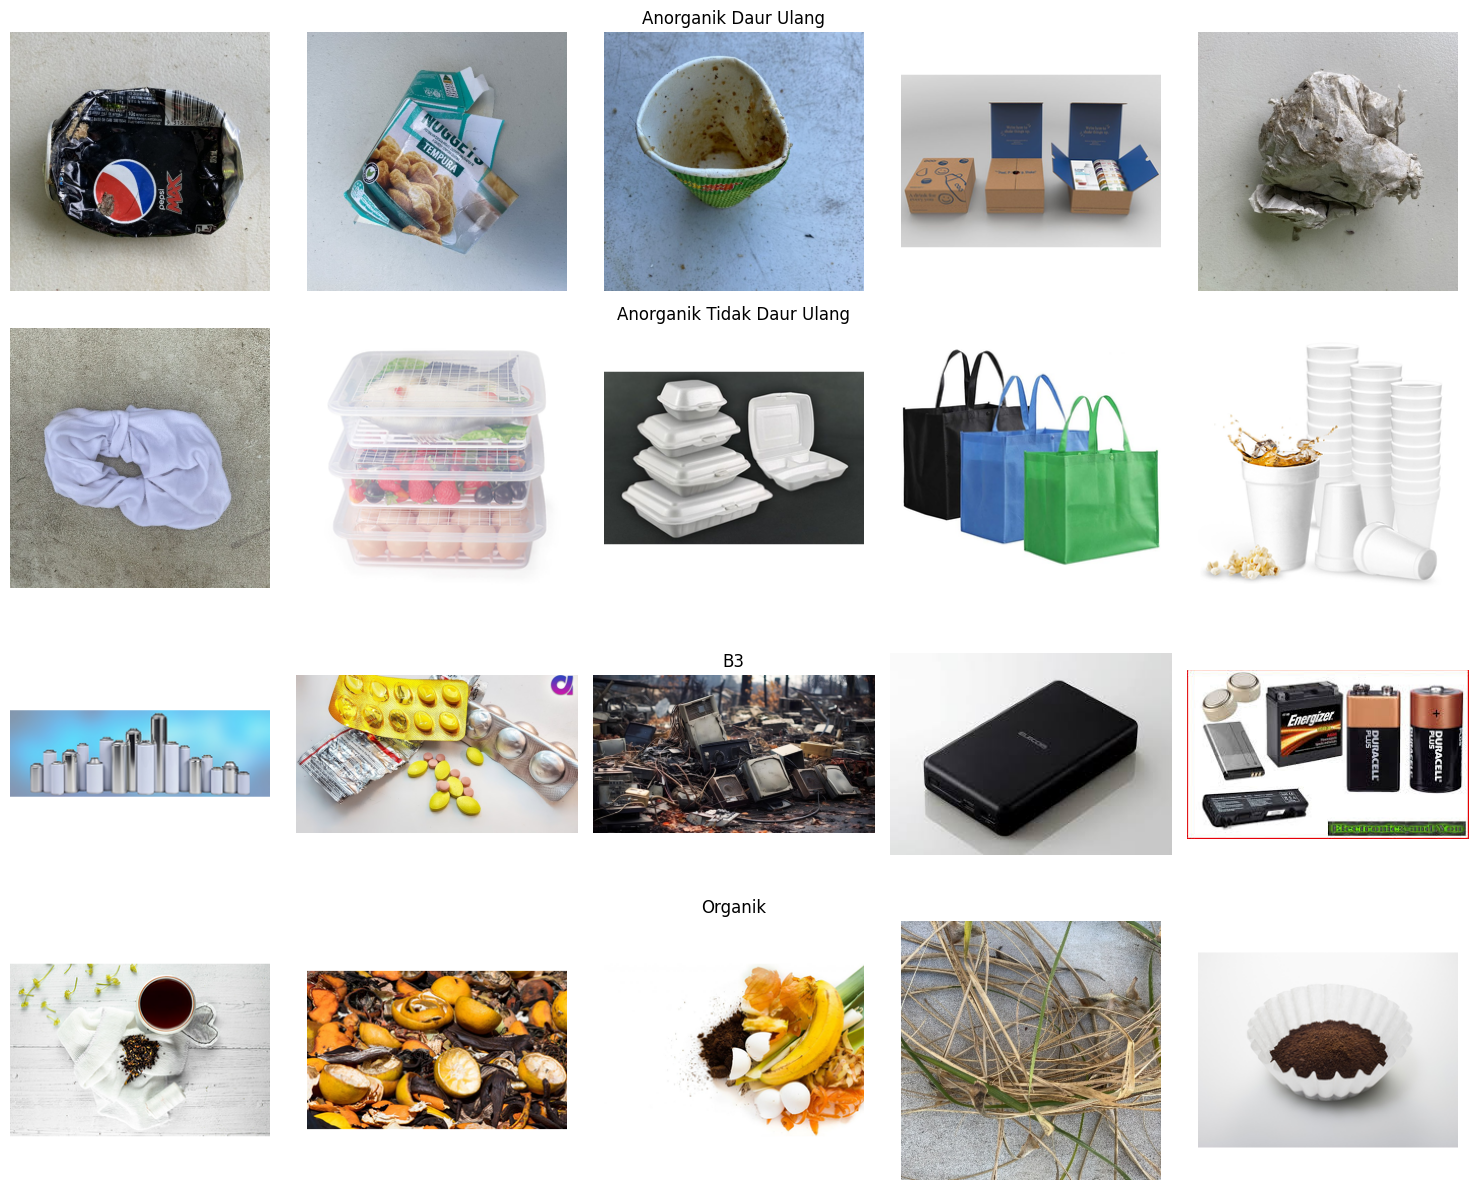

In [ ]:
# Path dan urutan kelas sesuai yang diinginkan
base_dir = '/content/dataset_sampah/sampah-klasifikasi-dataset'
ordered_classes = ['Anorganik Daur Ulang', 'Anorganik Tidak Daur Ulang', 'B3', 'Organik']

fig, axes = plt.subplots(len(ordered_classes), 5, figsize=(15, 3 * len(ordered_classes)))

for i, cls in enumerate(ordered_classes):
    cls_path = os.path.join(base_dir, cls)
    imgs = os.listdir(cls_path)
    sample_imgs = random.sample(imgs, 5)

    for j, img_name in enumerate(sample_imgs):
        img_path = os.path.join(cls_path, img_name)
        try:
            img = Image.open(img_path).convert("RGB")
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 2:
                axes[i, j].set_title(cls, fontsize=12)
        except Exception as e:
            print(f"Gagal membuka gambar: {img_path} -> {e}")
            axes[i, j].axis('off')
            axes[i, j].text(0.5, 0.5, 'Error', ha='center', va='center', color='red')

plt.tight_layout()
plt.show()

---
**Insights:**

1. **Visualisasi yang Terstruktur berdasarkan Kelas:**  
   - Grid yang dibuat memiliki baris sebanyak jumlah kelas (dalam hal ini 4 baris) dan 5 kolom per baris.  
   - Masing-masing baris mewakili kelas yang telah ditentukan dalam variabel `ordered_classes`:  
     • Baris pertama untuk “Anorganik Daur Ulang”  
     • Baris kedua untuk “Anorganik Tidak Daur Ulang”  
     • Baris ketiga untuk “B3”  
     • Baris keempat untuk “Organik”

2. **Sample Gambar Acak dari Setiap Kelas:**  
   - Kode menggunakan fungsi `random.sample` untuk memilih 5 gambar acak dari setiap kelas. Ini memberikan gambaran representatif dari variasi visual dalam tiap kategori tanpa bias dengan sampel yang selalu sama.  
   - Dengan melihat gambar-gambar acak ini, kami dapat memverifikasi apakah data visual sesuai dengan label yang diberikan dan apakah terdapat outlier atau kesalahan dalam pengorganisasian dataset.

3. **Penambahan Label Kelas yang Jelas:**  
   - Pada setiap baris, pada kolom ke-3 (jika `j == 2`), kode menempatkan judul dengan nama kelas. Hal ini memudahkan pengidentifikasian kelas secara langsung pada masing-masing baris, sehingga viewer dapat dengan cepat melihat distribusi kategori data.

4. **Penerapan Error Handling:**  
   - Jika ada gambar yang gagal dimuat (misalnya, jika terjadi error karena file corrupt atau format yang tidak didukung), maka cell yang bersangkutan akan menampilkan teks “Error” dengan warna merah, bersamaan dengan pencatatan error pada console. Ini memberikan indikator jika ada masalah pada beberapa file, yang penting untuk dilakukan perbaikan pada tahap preprocessing.

5. **Konversi ke Format RGB:**  
   - Setiap gambar dibuka dan langsung dikonversi ke format “RGB” dengan `Image.open(img_path).convert("RGB")`. Langkah ini memastikan konsistensi format input ke dalam pipeline training model, mengingat data gambar dari berbagai sumber bisa saja memiliki channel warna berbeda (misalnya grayscale atau CMYK).

6. **Ukuran dan Estetika Visualisasi:**  
   - Pengaturan ukuran figure melalui `figsize=(15, 3 * len(ordered_classes))` memberikan kontrol visual sehingga setiap baris memiliki cukup ruang untuk mengakomodasi 5 gambar tanpa terlihat sempit.
   - `plt.tight_layout()` digunakan untuk menghindari tumpang tindih antar subplot sehingga setiap gambar dan label dapat terlihat dengan jelas.

Secara keseluruhan, output ini membantu memvalidasi bahwa dataset tersusun secara benar dan setiap kelas memiliki representasi visual yang konsisten, yang sangat penting untuk langkah-langkah selanjutnya dalam pemodelan dan pelatihan deep learning. Jika terdapat gambar yang tidak mewakili kelas atau terdapat error dalam pembacaan, kami dapat segera melakukan perbaikan atau pengecekan lebih lanjut.

---

## **Analisis Ukuran File Gambar**

Pada tahap ini, kami mengumpulkan informasi mengenai ukuran file (dalam byte) untuk setiap gambar dalam dataset. Langkah ini berguna untuk:

- **Memastikan Konsistensi Data:**  
  Mengetahui apakah ukuran file tersebar dalam rentang yang luas atau hampir homogen. Hal ini dapat mengindikasikan variasi kualitas atau resolusi gambar yang perlu ditangani pada tahap preprocessing.
  
- **Identifikasi Outlier:**  
  Gambar dengan ukuran file yang sangat kecil atau sangat besar mungkin perlu diperiksa lebih lanjut untuk memastikan tidak ada data corrupt atau salah format.
  
- **Persiapan Preprocessing:**  
  Informasi ini bisa membantu menentukan strategi kompresi, resize, atau augmentasi yang sesuai berdasarkan kebutuhan input model.

---

In [ ]:
file_sizes = []

for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    for fname in os.listdir(cls_path):
        fpath = os.path.join(cls_path, fname)
        size = os.path.getsize(fpath)  # dalam byte
        file_sizes.append(size)

print(f'Ukuran file (bytes): min={min(file_sizes)}, max={max(file_sizes)}, rata-rata={np.mean(file_sizes):.2f}')

Ukuran file (bytes): min=1662, max=3658914, rata-rata=98667.10


---
**Insights:**

1. **Rentang Ukuran File yang Luas:**
   - **Minimum 1662 bytes:**  
     Ada gambar yang sangat kecil filenya. Ukuran sebesar 1662 bytes biasanya mengindikasikan:
     - Gambar mungkin beresolusi rendah atau telah mengalami kompresi yang sangat tinggi,
     - Potensi adanya gambar thumbnail atau karya yang tidak mengandung banyak detail.
   - **Maksimum 3,658,914 bytes (≈3.66 MB):**  
     Ada gambar dengan file yang sangat besar, yang umumnya berarti:
     - Gambar tersebut menyimpan banyak detail atau memiliki resolusi tinggi,
     - Bisa jadi gambar tersebut tidak mengalami kompresi ekstensif atau berasal dari sumber yang berbeda.
   - **Variabilitas:**  
     Jarak antara ukuran minimal dan maksimal yang cukup besar menunjukkan heterogenitas dataset dalam segi penyimpanan file. Ini mencerminkan bahwa sumber gambar bervariasi dari segi kualitas, resolusi, atau metode kompresi.

2. **Ukuran Rata-Rata File yang Relatif Kecil:**
   - **Rata-rata ~98,667 bytes (≈98 KB):**  
     Sebagian besar gambar dalam dataset cenderung memiliki ukuran file yang tidak terlalu besar. Hal ini bisa diartikan bahwa:
     - Rata-rata gambar mungkin tidak berevolusi resolusi ekstrem (cukup di bawah 100 KB menunjukkan penggunaan kompresi yang signifikan, umumnya pada format JPEG atau kompresi PNG),
     - Meskipun ada gambar yang berukuran besar, distribusi gambar menunjukkan bahwa file-file yang lebih kecil mendominasi dataset.
   - **Implikasi:**  
     Ukuran file yang lebih kecil cenderung:
     - Mempercepat proses loading data selama preprocessing dan pelatihan,
     - Namun, jika terlalu kecil, dapat menimbulkan kekhawatiran terkait dengan kualitas visual dan informasi yang terkandung, yang berpotensi memengaruhi akurasi model.

3. **Pertimbangan Preprocessing dan Konsistensi Data:**
   - **Normalisasi Input:**  
     Mengingat variasi ukuran file, penting untuk menerapkan preprocessing yang meratakan input:
     - Mengubah semua gambar ke ukuran dimensi yang seragam (misalnya 224×224) agar perbedaan ukuran file tidak memengaruhi performa model.
     - Meskipun ukuran file bervariasi, gambar biasanya diubah ke array numerik dengan dimensi tetap, sehingga detail yang sangat kecil atau besar akan terstandarisasi.
   - **Pemeriksaan Outlier:**  
     Gambar dengan ukuran file ekstrem (baik sangat kecil atau sangat besar) bisa dianggap outlier. Kami mungkin perlu:
     - Melakukan pemeriksaan kualitas terhadap gambar-gambar tersebut,
     - Memastikan bahwa outlier tidak memberikan noise atau informasi yang menyesatkan pada model.

4. **Keterkaitan Format File dan Kualitas Gambar:**
   - **Format dan Kompresi:**  
     Ukuran file juga dipengaruhi oleh format gambar (seperti PNG, JPG, atau JPEG), di mana:
     - Gambar dengan format JPEG cenderung memiliki ukuran file relatif kecil karena kompresi lossy,
     - Sedangkan gambar dengan format PNG mungkin memiliki ukuran yang lebih besar jika tidak dikompresi secara agresif.
   - **Insight Lebih Lanjut:**  
     Mengingat data sebelumnya menunjukkan bahwa mayoritas gambar berformat PNG dan JPG, perbedaan ukuran file dapat mencerminkan variasi dalam tingkat kompresi, sesuatu yang harus diperhatikan ketika mengembangkan pipeline preprocessing agar data memiliki konsistensi visual yang diperlukan oleh model.

Secara keseluruhan, perbedaan signifikan antara ukuran file minimum dan maksimum, serta rata-rata file yang relatif kecil, menunjukkan adanya heterogenitas dalam dataset. Ini menekankan pentingnya tahap preprocessing, seperti resizing dan normalisasi, agar setiap gambar diubah ke format dan resolusi yang konsisten sebelum pelatihan. Pemahaman tentang distribusi ukuran file juga membantu dalam mengidentifikasi potensi outlier yang perlu diperbaiki atau dikeluarkan agar tidak mengganggu proses pelatihan model deep learning.

---

## **Data Preprocessing dan Augmentation**

### **Pemisahan Dataset (Train, Validation, Test)**

Pada tahap ini, kami melakukan pembagian dataset mentah ke dalam tiga bagian, yaitu training, validation, dan testing. Proses splitting dilakukan dengan menggunakan library `splitfolders` guna memastikan bahwa data terbagi secara proporsional untuk keperluan pelatihan, validasi, dan evaluasi model. Kami menggunakan rasio pembagian 70:15:15, dan menetapkan parameter `move=False` sehingga file hanya disalin, bukan dipindahkan. Langkah ini menjamin file asli tetap utuh dan memudahkan reprodusibilitas eksperimen dengan menetapkan nilai `seed`.

**Penjelasan:**

- **Dataset Mentah**:  
  Variabel `original_dataset_dir` menyimpan lokasi dataset asli sebelum diproses. Ini merupakan awal dari alur data pada proyek.

- **Fungsi Split**:  
  Fungsi `splitfolders.ratio` digunakan untuk membagi dataset sesuai rasio yang diinginkan (70% pelatihan, 15% validasi, dan 15% pengujian). Parameter `seed` diaplikasikan untuk menjamin bahwa proses pembelahan dapat direproduksi secara konsisten.

- **Mode Duplikasi File**:  
  Dengan `move=False`, seluruh file hanya disalin ke folder output, sehingga file asli tetap berada di lokasi semula.

- **Directory Output**:  
  Setelah proses split selesai, kami tentukan path untuk folder training (`train_dir`), validation (`val_dir`), dan testing (`test_dir`). Ini mempermudah pengaksesan dataset yang sudah terbagi untuk tahap preprocessing selanjutnya.

---

In [ ]:
# Path ke dataset mentah
original_dataset_dir = '/content/dataset_sampah/sampah-klasifikasi-dataset'

# Split ke folder train, val, test
splitfolders.ratio(
    original_dataset_dir,
    output="/content/dataset_split",
    seed=42,
    ratio=(0.7, 0.15, 0.15),
    move=False  # False = copy file, True = pindahkan file
)

# Path setelah split
train_dir = '/content/dataset_split/train'
val_dir = '/content/dataset_split/val'
test_dir = '/content/dataset_split/test'

Copying files: 9275 files [00:04, 1974.63 files/s]


---
**Insights:**

1. **Total Jumlah Data**  
   - Berdasarkan pemeriksaan sebelumnya, total gambar dalam dataset adalah 9275 (1840 + 3550 + 2060 + 1825).  
   - Pesan output mengonfirmasi bahwa semua 9275 file telah diproses, sehingga tidak ada gambar yang terlewatkan saat pembagian.

2. **Pembagian Data Sesuai Rasio**  
   - Kode menggunakan fungsi `splitfolders.ratio` dengan rasio (0.7, 0.15, 0.15).  
     - 70% untuk training  
     - 15% untuk validation  
     - 15% untuk test  
   - Rasio ini akan memastikan bahwa sekitar 6492 gambar (70% dari 9275) termasuk dalam set pelatihan, dan sekitar 1391 gambar masing-masing untuk validation dan test.  
   - Pembagian yang proporsional ini penting untuk pelatihan model yang stabil, validasi, dan pengujian performa model pada data yang belum pernah dilihat.

3. **Penggunaan Random Seed**  
   - Parameter `seed=42` memastikan bahwa proses pembagian bersifat reprodusibel.  
   - Dengan seed tersebut, setiap kali kode dijalankan, pembagian dataset akan konsisten, yang membantu dalam mendemonstrasikan hasil eksperimen yang dapat diulangi.

4. **Operasi Penyalinan File (Copy vs. Move)**  
   - Parameter `move=False` menunjukkan bahwa file hanya disalin ke folder output, bukan dipindahkan.  
   - Hal ini membuat data asli tetap utuh di lokasi `original_dataset_dir`.  
   - Pendekatan ini berguna ketika Anda ingin mempertahankan dataset mentah sebagai cadangan atau referensi sambil bekerja dengan dataset yang telah terpisah.

5. **Kinerja Proses Split**  
   - Output "Copying files: 9275 files [00:04, 1974.63 files/s]" menunjukkan bahwa sistem mampu melakukan penyalinan file dengan efisiensi tinggi, sekitar 1974 file per detik.  
   - Proses selesai dalam waktu sekitar 4 detik, yang menunjukkan bahwa pengoperasian ini cepat dan tidak menjadi bottleneck pada pipeline data.

Secara keseluruhan, proses pembagian dataset menggunakan library `splitfolders` telah berjalan dengan baik. Data 9275 gambar telah dibagi secara proporsional ke dalam tiga subset (train, val, test) berdasarkan rasio yang ditentukan, dengan pengaturan yang reprodusibel. Kondisi ini menyiapkan tahap selanjutnya dengan dataset yang terstruktur dan siap digunakan untuk pelatihan model deep learning.

---

### **Data Augmentation dan Pembuatan Image Generator**

Pada tahap ini, kami menyiapkan praproses untuk data gambar dengan melakukan augmentasi khusus untuk data pelatihan. Augmentasi membantu meningkatkan keragaman dataset dengan membuat variasi pada gambar, seperti rotasi, pergeseran, flipping, dan pengaturan kecerahan. Hal ini penting untuk mengurangi overfitting dan meningkatkan kemampuan generalisasi model.

**Detail Implementasi:**

- **Augmentasi untuk Training:**  
  Dengan menggunakan `ImageDataGenerator` dari Keras, kami menerapkan augmentasi seperti:
  - `rescale=1./255`: Normalisasi nilai pixel agar berada di rentang [0, 1].
  - `rotation_range=30`: Memungkinkan rotasi gambar hingga 30 derajat.
  - `zoom_range=0.3`: Mengatur zoom acak pada gambar.
  - `width_shift_range` & `height_shift_range=0.2`: Menggeser gambar secara horizontal dan vertikal sebesar 20%.
  - `shear_range=0.2`: Menerapkan transformasi shear.
  - `horizontal_flip=True`: Membalik gambar secara horizontal.
  - `brightness_range=[0.7, 1.3]`: Menyesuaikan kecerahan gambar dalam rentang yang diberikan.

- **Generator untuk Validation & Test:**  
  Data validasi dan pengujian hanya melalui normalisasi (rescaling) untuk menjaga konsistensi sehingga evaluasi dapat dilakukan secara fair.

- **Flow from Directory:**  
  Metode `flow_from_directory` digunakan untuk membaca gambar dari direktori yang telah dipisahkan ke dalam set train, validation, dan test. Parameter seperti `target_size`, `batch_size`, dan `class_mode` diatur sesuai kebutuhan. Khusus untuk **test_generator**, opsi `shuffle=False` diterapkan agar urutan data tidak diacak. Hal ini penting untuk evaluasi akurasi per kelas nanti.

---

In [ ]:
# Augmentasi hanya untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]
)

# Untuk validation & test (hanya rescale)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Penting untuk evaluasi akurasi per kelas nanti
)

Found 6492 images belonging to 4 classes.
Found 1390 images belonging to 4 classes.
Found 1393 images belonging to 4 classes.


---
**Insights:**

1. **Pembagian Dataset Sesuai Rasio:**  
   - **Training set:** 6492 gambar  
   - **Validation set:** 1390 gambar  
   - **Test set:** 1393 gambar  
     
   Angka-angka ini konsisten dengan rasio pembagian 70:15:15 yang telah ditetapkan sebelumnya. Dari total 9275 gambar, pembagian ini memastikan model dilatih pada mayoritas data, sambil menyediakan set validasi dan test yang cukup untuk evaluasi yang handal.

2. **Konsistensi Jumlah Kelas:**  
   - Setiap generator (train, validation, test) menemukan gambar dari **4 kelas**.  
     
   Hal ini menunjukkan bahwa struktur folder data telah dipertahankan setelah pembagian dataset. Kelas-kelas yang ada (baik untuk training, validasi, maupun test) konsisten sehingga tidak ada kelas yang hilang, yang sangat penting untuk mencegah bias dalam pelatihan dan evaluasi.

3. **Penerapan Augmentasi Secara Selektif:**  
   - Generator training menggunakan `train_datagen` yang menerapkan augmentasi seperti rotasi, zoom, pergeseran lebar dan tinggi, shear, horizontal flip, serta penyesuaian kecerahan.  
   - Sementara generator untuk validasi dan test hanya menggunakan proses *rescale* (normalisasi nilai piksel) agar data tetap konsisten dan tidak diubah secara acak.
     
   Strategi ini memastikan bahwa model mendapatkan variasi data saat proses pelatihan (yang bermanfaat untuk generalisasi) namun validasi dan test set tetap berbobot dan merepresentasikan data asli untuk evaluasi yang akurat.

4. **Ukuran Input dan Batch Size yang Tepat:**  
   - Gambar di-resize ke ukuran **(224, 224)** yang merupakan ukuran standar input untuk banyak model pretrained seperti VGG16.  
   - Penggunaan batch size sebesar **32** merupakan pilihan yang umum dan efisien untuk pelatihan model dengan ketersediaan memori GPU.
     
   Parameter ini membantu memastikan bahwa input ke model konsisten dan memaksimalkan pemanfaatan hardware selama pelatihan.

5. **Shuffle Disabled pada Test Generator:**  
   - Pada `test_generator`, parameter `shuffle=False` diaktifkan.  
     
   Ini sangat penting untuk evaluasi karena memungkinkan urutan gambar dalam test set tetap konsisten, memudahkan analisis seperti pembuatan confusion matrix dan evaluasi per kelas tanpa kekacauan akibat pengacakan.

6. **Kecepatan dan Efisiensi Proses Data:**  
   - Output ini juga menunjukkan bahwa fungsi `flow_from_directory` berhasil mendeteksi seluruh file dalam setiap direktori secara cepat dan efisien.  
     
   Hal ini memberikan kepercayaan bahwa pipeline data sudah siap untuk langkah selanjutnya dalam pembuatan dan pelatihan model deep learning.

Secara keseluruhan, output ini mengindikasikan bahwa dataset telah dibagi dan dipersiapkan dengan benar untuk melatih model deep learning. Distribusi file yang konsisten di setiap subset serta penerapan augmentasi secara selektif akan memberikan dasar yang kuat untuk pelatihan, validasi, dan evaluasi model yang andal.

---

### **Pengecekan Label Kelas dan Pembuatan Mapping**

Pada tahap ini, kami mengambil atribut `class_indices` dari `train_generator` untuk mendapatkan mapping antara nama kelas dan indeks numerik. Mapping ini digunakan oleh model dalam proses pelatihan dan evaluasi untuk mengelola label secara otomatis. Selanjutnya, kami membuat dictionary `label_map` yang merupakan kebalikan dari `class_indices`, sehingga memudahkan untuk mengonversi indeks prediksi model kembali ke nama kelas saat evaluasi atau inferensi.

---

In [ ]:
class_indices = train_generator.class_indices
print("Label Kelas:", class_indices)

# Untuk digunakan kembali saat evaluasi model
label_map = {v: k for k, v in class_indices.items()}

Label Kelas: {'Anorganik Daur Ulang': 0, 'Anorganik Tidak Daur Ulang': 1, 'B3': 2, 'Organik': 3}


### **Cek Ukuran Dataset**

Pada tahap ini, kami mencetak jumlah gambar pada setiap subset dataset (training, validasi, dan testing) yang dihasilkan oleh generator. Langkah ini berguna untuk memastikan bahwa pembagian dataset telah dilakukan sesuai dengan rasio yang ditentukan sebelumnya. Mengecek jumlah gambar juga membantu memverifikasi bahwa tidak ada data yang terlewatkan atau salah alokasi, sehingga nantinya proses pelatihan, validasi, dan evaluasi model dapat berjalan secara optimal.

---

In [ ]:
print("Jumlah gambar:")
print("Train :", train_generator.samples)
print("Val   :", val_generator.samples)
print("Test  :", test_generator.samples)

Jumlah gambar:
Train : 6492
Val   : 1390
Test  : 1393


---
**Insights:**

1. **Verifikasi Pembagian Dataset:**

   - **Total Gambar:** Jumlah gambar keseluruhan yang terdistribusi di antara tiga subset adalah 6492 + 1390 + 1393 = 9275. Ini sesuai dengan jumlah file yang ada dalam dataset asli, mengonfirmasi bahwa tidak ada data yang hilang selama proses pembagian.

2. **Kesesuaian Rasio Pembagian:**

   - Proses pembagian menggunakan rasio yang telah ditetapkan sebelumnya (70% training, 15% validasi, dan 15% test).  
   - Dari output, training set terdiri dari 6492 gambar, sedangkan masing-masing validation dan test set berisi sekitar 1390–1393 gambar. Hal ini menunjukkan bahwa pembagian telah diimplementasikan dengan benar dan konsisten.

3. **Konsistensi Jumlah Kelas:**

   - Ketiga generator (train, validation, test) mendeteksi 4 kelas yang sama. Struktur direktori yang tersusun berdasarkan kelas memastikan bahwa setiap subset merepresentasikan distribusi data dari semua kelas secara seimbang.
   - Hal ini penting agar model dapat dilatih, divalidasi, dan diujikan dengan distribusi yang representatif dari keseluruhan kelas yang ada.

4. **Implikasi untuk Pelatihan Model:**

   - **Train Set (6492 gambar):** Dengan jumlah yang lebih besar pada training set, model memiliki cukup data untuk belajar pola dan fitur dari setiap kelas. Ini memberikan landasan yang baik untuk proses pelatihan yang efektif.
   - **Validation dan Test Set (~1390 gambar masing-masing):** Kedua subset ini memberikan ukuran sample yang memadai untuk:
     - Validasi: Memungkinkan pengawasan yang konsisten terhadap performa model selama tahap pelatihan, membantu dalam pengaturan hyperparameter secara iteratif.
     - Test: Memberikan evaluasi akhir yang tidak bias terhadap performa model pada data yang belum pernah dilihat.

Secara keseluruhan, output ini memberikan keyakinan bahwa dataset telah dibagi dengan baik dan siap untuk digunakan dalam pelatihan model deep learning. Pembagian yang proporsional dan representatif memastikan bahwa evaluasi model nantinya akan memberikan gambaran yang akurat tentang performa model pada data nyata.

---

### **Visualisasi Sampel Gambar dari Generator**

Pada tahap ini, kami mengambil satu batch dari `train_generator` untuk menampilkan contoh gambar beserta labelnya. Langkah visualisasi ini sangat penting untuk:

- **Memverifikasi Augmentasi**: Menampilkan sample gambar memastikan bahwa augmentasi telah diterapkan dengan benar pada data pelatihan.
- **Pelabelan**: Memastikan bahwa label dari gambar yang ditampilkan sudah benar, dengan bantuan mapping dari angka (label encoder) ke nama kelas.
- **Pemeriksaan Visual**: Mendapatkan gambaran awal tentang kualitas dan variasi gambar dalam dataset.

Langkah-langkah yang dilakukan adalah:
  
1. **Ambil Batch Data**: Menggunakan fungsi `next(train_generator)`, yang mengembalikan sepasang data berupa image array dan one-hot encoded label.
2. **Plotting Data**: Membuat figure dengan ukuran yang sesuai (`figsize=(12, 6)`) dan menggunakan grid subplot (2 baris dengan 5 kolom) untuk menampilkan 10 gambar sample.
3. **Konversi Label**: Menggunakan `np.argmax(labels[i])` untuk mendapatkan indeks kelas prediksi, dan kemudian menerjemahkannya menjadi nama kelas menggunakan dictionary `label_map`.
4. **Tampilan Gambar**: Menampilkan setiap gambar tanpa sumbu dan menampilkan judul sesuai dengan kelas masing-masing.

---

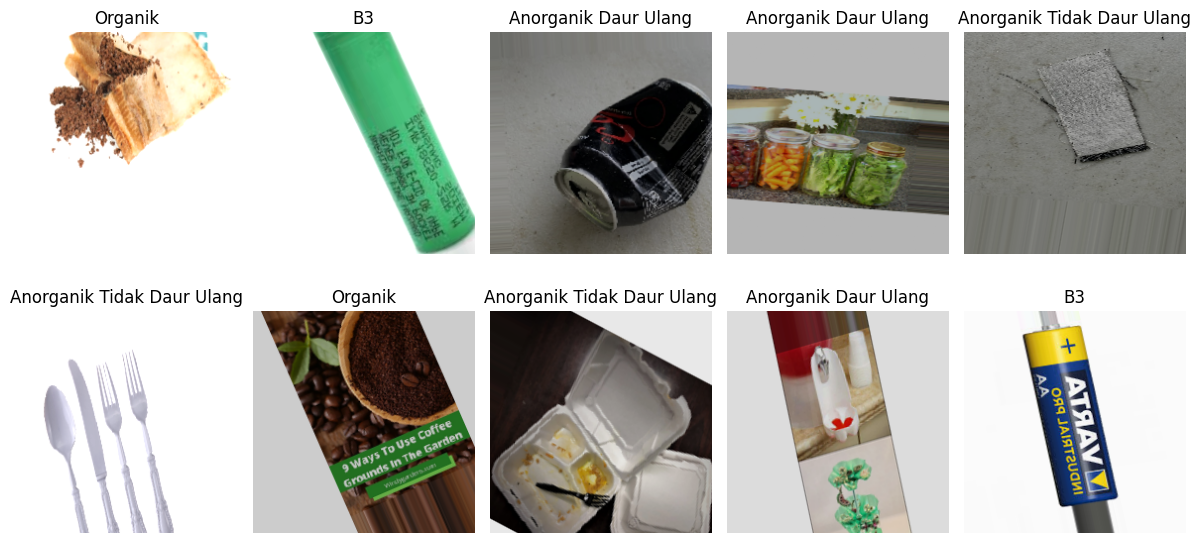

In [ ]:
# Ambil beberapa gambar dari generator
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    label_idx = np.argmax(labels[i])
    plt.title(label_map[label_idx])
plt.tight_layout()
plt.show()

---
**Insigts:**

1. **Verifikasi Preprocessing dan Augmentasi:**
   - **Rescaling:** Semua gambar telah dinormalisasi dengan membagi nilai pixel dengan 255 (sesuai dengan parameter `rescale=1./255`). Hal ini dapat dilihat dari konsistensi pencahayaan gambar dan warna yang tidak tampak overexposed atau underexposed.
   - **Augmentasi:** Karena data training diproses melalui `ImageDataGenerator` dengan augmentasi (rotasi, zoom, pergeseran, shear, horizontal flip, dan perubahan brightness), gambar yang dihasilkan kemungkinan memiliki variasi visual, misalnya, orientasi dan pencahayaan yang berbeda-beda. Visualisasi ini membantu mengonfirmasi bahwa augmentasi telah diterapkan dengan benar sehingga model nantinya dapat lebih tahan terhadap variasi dalam data nyata.

2. **Kelengkapan Label:**
   - **Mapping Label:** Setiap gambar ditampilkan dengan judul yang merupakan label yang dikonversi dari one-hot encoded label menggunakan `label_map`. Ini memastikan bahwa label yang ditampilkan sesuai dengan kategori yang diharapkan.
   - **Konsistensi Label:** Kami dapat dengan mudah memverifikasi bahwa gambar yang ditampilkan sesuai dengan kategori yang seharusnya. Jika terdapat ketidaksesuaian antara fitur gambar dan labelnya, maka ini akan terdeteksi secara visual pada grid.

3. **Distribusi dan Variasi Visual:**
   - **Variasi Konten Gambar:** Karena gambar dipilih secara acak dari batch training, visualisasi ini memberikan gambaran tentang keberagaman data yang dimiliki oleh masing-masing kelas, apakah ada kesamaan pola, perbedaan dalam komposisi, maupun variasi dalam latar belakang dan objek.
   - **Ukuran dan Resolusi Terstandarisasi:** Semua gambar sudah di-resize ke ukuran target (224x224) sehingga memastikan bahwa data yang masuk ke model memiliki konsistensi ukuran yang diharapkan oleh arsitektur model (seperti VGG16).

4. **Validasi Pipeline:**
   - **Seluruh Pipeline Data:** Melalui visualisasi ini, kami dapat mengecek apakah pipeline mulai dari pembacaan file, augmentasi, hingga pengkodean label berfungsi dengan baik. Tidak terdapat error yang ditampilkan, dan setiap subplot menunjukkan gambar yang dapat diinterpretasikan, yang merupakan verifikasi visual bahwa alur persiapan data sudah benar.

Secara keseluruhan, visualisasi ini merupakan verifikasi interaktif bahwa data training telah diproses dengan benar, termasuk augmentasi dan pelabelan, serta mempersiapkan dasar yang kuat untuk tahap pelatihan model deep learning selanjutnya.

---

## **Modeling**

### **Transfer Learning dengan VGG16**

Pada tahap ini, kami menggunakan model VGG16 yang sudah dilatih (pretrained) pada dataset ImageNet sebagai feature extractor. Langkah-langkah yang dilakukan adalah:

1. **Memuat VGG16 & Freeze Layer**  
   Kami memuat model VGG16 tanpa fully connected layer (gunakan parameter `include_top=False`) sehingga hanya layer convolutional yang digunakan. Seluruh layer dibekukan (freeze) untuk memastikan bobot yang sudah dipelajari tidak berubah saat training awal. Langkah ini disebut *feature extraction*.

2. **Menambahkan Top Layers**  
   Untuk menyesuaikan model pada permasalahan klasifikasi sampah dengan 4 kelas, kami menambahkan beberapa layer di atas base model. Pertama, output dari VGG16 di-*flatten*, kemudian dilanjutkan dengan layer Dense berukuran 256 dengan fungsi aktivasi ReLU dan Dropout 0.5 untuk mencegah overfitting. Terakhir, layer Dense dengan 4 unit dan aktivasi softmax untuk menghasilkan probabilitas setiap kelas.

3. **Kompilasi Model (Tahap Feature Extraction)**  
   Model dikompilasi dengan optimizer Adam dan learning rate 1e-4. Penggunaan learning rate relatif besar sehingga pelatihan awal (feature extraction) berjalan cepat.

4. **Callbacks**  
   Kami menggunakan EarlyStopping (monitoring nilai *val_loss* dengan kesabaran (patience) 5) untuk menghentikan training secara dini jika tidak ada perbaikan, serta ModelCheckpoint untuk menyimpan model terbaik berdasarkan akurasi validasi.

5. **Training Awal (Feature Extraction)**  
   Model dilatih selama 20 epoch dengan data pelatihan yang dihasilkan oleh generator. Pada tahap ini, hanya top layers yang belajar sedangkan VGG16 tetap dibekukan.

6. **Fine-Tuning**  
   Setelah proses feature extraction, untuk meningkatkan performa model, kami membuka (unfreeze) beberapa layer terakhir dari VGG16 (dalam contoh ini 4 layer terakhir) agar bobot pada bagian fitur dapat diadaptasi lebih lanjut pada dataset spesifik.

7. **Kompilasi Ulang untuk Fine-Tuning**  
   Karena fine-tuning memerlukan penyesuaian halus, model dikompilasi ulang dengan learning rate lebih kecil (1e-5) untuk menghindari perubahan bobot yang terlalu dratis.

8. **Training Fine-Tuning**  
   Lanjutkan pelatihan model selama 30 epoch dengan data training yang sama dan callback yang sama untuk memperbaiki performa model.

9. **Evaluasi Model**  
   Terakhir, model dievaluasi pada test set untuk mendapatkan akurasi akhir.

---

In [ ]:
# 1. Load VGG16 tanpa fully connected layer, freeze semua layer dulu
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False

# 2. Tambah top layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 3. Compile model dengan learning rate agak besar untuk training awal
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_vgg16_model.h5", monitor='val_accuracy', save_best_only=True)
]

# 5. Training awal (feature extraction)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks
)

# 6. Fine-tuning: unfreeze beberapa layer terakhir VGG16 untuk training lanjut
for layer in base_model.layers[-4:]:
    layer.trainable = True

# 7. Compile ulang dengan learning rate kecil untuk fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 8. Training fine-tuning
history_finetune = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks
)

# 9. Evaluasi di test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Akurasi pada Test Set setelah Fine-Tuning: {test_acc * 100:.2f}%")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.4978 - loss: 1.1945

203/203 ━━━━━━━━━━━━━━━━━━━━ 155s 690ms/step - accuracy: 0.4982 - loss: 1.1937 - val_accuracy: 0.6799 - val_loss: 0.7496
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.6389 - loss: 0.8732

203/203 ━━━━━━━━━━━━━━━━━━━━ 127s 627ms/step - accuracy: 0.6390 - loss: 0.8730 - val_accuracy: 0.7511 - val_loss: 0.6435
Epoch 3/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.6989 - loss: 0.7910

203/203 ━━━━━━━━━━━━━━━━━━━━ 124s 613ms/step - accuracy: 0.6989 - loss: 0.7910 - val_accuracy: 0.7741 - val_loss: 0.5785
Epoch 4/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.7169 - loss: 0.7351

203/203 ━━━━━━━━━━━━━━━━━━━━ 125s 617ms/step - accuracy: 0.7169 - loss: 0.7351 - val_accuracy: 0.7856 - val_loss: 0.5640
Epoch 5/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 141s 611ms/step - accuracy: 0.7235 - loss: 0.7153 - val_accuracy: 0.7842 - val_loss: 0.5389
Epoch 6/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.7383 - loss: 0.6755

203/203 ━━━━━━━━━━━━━━━━━━━━ 127s 625ms/step - accuracy: 0.7383 - loss: 0.6755 - val_accuracy: 0.7863 - val_loss: 0.5322
Epoch 7/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.7376 - loss: 0.6609

203/203 ━━━━━━━━━━━━━━━━━━━━ 140s 617ms/step - accuracy: 0.7376 - loss: 0.6609 - val_accuracy: 0.8137 - val_loss: 0.5033
Epoch 8/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 143s 623ms/step - accuracy: 0.7460 - loss: 0.6420 - val_accuracy: 0.8058 - val_loss: 0.5000
Epoch 9/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 141s 619ms/step - accuracy: 0.7496 - loss: 0.6416 - val_accuracy: 0.8065 - val_loss: 0.4975
Epoch 10/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.7504 - loss: 0.6264

203/203 ━━━━━━━━━━━━━━━━━━━━ 128s 631ms/step - accuracy: 0.7504 - loss: 0.6264 - val_accuracy: 0.8201 - val_loss: 0.4698
Epoch 11/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.7720 - loss: 0.5996

203/203 ━━━━━━━━━━━━━━━━━━━━ 125s 616ms/step - accuracy: 0.7720 - loss: 0.5996 - val_accuracy: 0.8273 - val_loss: 0.4616
Epoch 12/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 125s 615ms/step - accuracy: 0.7786 - loss: 0.5811 - val_accuracy: 0.8230 - val_loss: 0.4669
Epoch 13/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 142s 617ms/step - accuracy: 0.7657 - loss: 0.5941 - val_accuracy: 0.8259 - val_loss: 0.4578
Epoch 14/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.7793 - loss: 0.5677

203/203 ━━━━━━━━━━━━━━━━━━━━ 127s 628ms/step - accuracy: 0.7793 - loss: 0.5677 - val_accuracy: 0.8453 - val_loss: 0.4212
Epoch 15/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 140s 619ms/step - accuracy: 0.7776 - loss: 0.5723 - val_accuracy: 0.8446 - val_loss: 0.4280
Epoch 16/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 126s 618ms/step - accuracy: 0.7797 - loss: 0.5672 - val_accuracy: 0.8216 - val_loss: 0.4491
Epoch 17/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.7781 - loss: 0.5669

203/203 ━━━━━━━━━━━━━━━━━━━━ 124s 608ms/step - accuracy: 0.7781 - loss: 0.5668 - val_accuracy: 0.8468 - val_loss: 0.4185
Epoch 18/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 123s 606ms/step - accuracy: 0.7901 - loss: 0.5570 - val_accuracy: 0.8468 - val_loss: 0.4188
Epoch 19/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 124s 610ms/step - accuracy: 0.7867 - loss: 0.5434 - val_accuracy: 0.8446 - val_loss: 0.4143
Epoch 20/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 127s 625ms/step - accuracy: 0.7954 - loss: 0.5375 - val_accuracy: 0.8388 - val_loss: 0.4260
Epoch 1/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.8065 - loss: 0.5063

203/203 ━━━━━━━━━━━━━━━━━━━━ 137s 647ms/step - accuracy: 0.8065 - loss: 0.5062 - val_accuracy: 0.8583 - val_loss: 0.3994
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.8307 - loss: 0.4557

203/203 ━━━━━━━━━━━━━━━━━━━━ 130s 642ms/step - accuracy: 0.8307 - loss: 0.4556 - val_accuracy: 0.8755 - val_loss: 0.3465
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.8413 - loss: 0.4233

203/203 ━━━━━━━━━━━━━━━━━━━━ 127s 624ms/step - accuracy: 0.8413 - loss: 0.4233 - val_accuracy: 0.8849 - val_loss: 0.3315
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 126s 622ms/step - accuracy: 0.8484 - loss: 0.4100 - val_accuracy: 0.8669 - val_loss: 0.3765
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 128s 629ms/step - accuracy: 0.8551 - loss: 0.3936 - val_accuracy: 0.8806 - val_loss: 0.3300
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.8643 - loss: 0.3597

203/203 ━━━━━━━━━━━━━━━━━━━━ 127s 626ms/step - accuracy: 0.8643 - loss: 0.3598 - val_accuracy: 0.8871 - val_loss: 0.3138
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 129s 637ms/step - accuracy: 0.8777 - loss: 0.3413 - val_accuracy: 0.8784 - val_loss: 0.3335
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.8834 - loss: 0.3211

203/203 ━━━━━━━━━━━━━━━━━━━━ 130s 638ms/step - accuracy: 0.8834 - loss: 0.3211 - val_accuracy: 0.8921 - val_loss: 0.3015
Epoch 9/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 140s 628ms/step - accuracy: 0.8874 - loss: 0.3006 - val_accuracy: 0.8892 - val_loss: 0.3064
Epoch 10/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 129s 634ms/step - accuracy: 0.8923 - loss: 0.2919 - val_accuracy: 0.8871 - val_loss: 0.3156
Epoch 11/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.8913 - loss: 0.2983

203/203 ━━━━━━━━━━━━━━━━━━━━ 130s 642ms/step - accuracy: 0.8913 - loss: 0.2983 - val_accuracy: 0.8964 - val_loss: 0.2894
Epoch 12/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.8953 - loss: 0.2795

203/203 ━━━━━━━━━━━━━━━━━━━━ 128s 630ms/step - accuracy: 0.8953 - loss: 0.2794 - val_accuracy: 0.9000 - val_loss: 0.2828
Epoch 13/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 126s 622ms/step - accuracy: 0.9030 - loss: 0.2650 - val_accuracy: 0.8993 - val_loss: 0.2905
Epoch 14/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 144s 631ms/step - accuracy: 0.9040 - loss: 0.2435 - val_accuracy: 0.8942 - val_loss: 0.3176
Epoch 15/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 127s 627ms/step - accuracy: 0.9107 - loss: 0.2461 - val_accuracy: 0.8978 - val_loss: 0.3188
Epoch 16/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 125s 618ms/step - accuracy: 0.9182 - loss: 0.2206 - val_accuracy: 0.8978 - val_loss: 0.3218
Epoch 17/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.9197 - loss: 0.2259

203/203 ━━━━━━━━━━━━━━━━━━━━ 130s 641ms/step - accuracy: 0.9197 - loss: 0.2259 - val_accuracy: 0.9065 - val_loss: 0.2733
Epoch 18/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 127s 623ms/step - accuracy: 0.9277 - loss: 0.1979 - val_accuracy: 0.9014 - val_loss: 0.2874
Epoch 19/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 128s 632ms/step - accuracy: 0.9266 - loss: 0.2126 - val_accuracy: 0.9065 - val_loss: 0.2823
Epoch 20/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 127s 626ms/step - accuracy: 0.9392 - loss: 0.1841 - val_accuracy: 0.9050 - val_loss: 0.3169
Epoch 21/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 141s 621ms/step - accuracy: 0.9360 - loss: 0.1749 - val_accuracy: 0.8993 - val_loss: 0.3178
Epoch 22/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.9286 - loss: 0.2020

203/203 ━━━━━━━━━━━━━━━━━━━━ 128s 631ms/step - accuracy: 0.9286 - loss: 0.2020 - val_accuracy: 0.9086 - val_loss: 0.2929
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 381ms/step - accuracy: 0.9105 - loss: 0.2702
Akurasi pada Test Set setelah Fine-Tuning: 90.60%


---
**Insights:**

1. **Pendekatan Transfer Learning yang Terstruktur:**

   - **Phase 1 (Feature Extraction):**  
     - VGG16 dimuat tanpa fully connected layers, dan seluruh layer konvolusional dibekukan.  
     - Top layers (Flatten → Dense (256, ReLU) → Dropout 0.5 → Dense (4, softmax)) ditambahkan untuk mengadaptasi model pada klasifikasi dengan 4 kelas.
     - Pada tahap feature extraction, model dilatih selama 20 epoch dengan learning rate 1e-4.
   
   - **Phase 2 (Fine-Tuning):**  
     - Setelah feature extraction, 4 layer terakhir dari base VGG16 di-unfreeze untuk melakukan fine-tuning, memungkinkan penyesuaian lebih spesifik pada dataset.
     - Model dikompilasi ulang dengan learning rate yang lebih kecil (1e-5) dan dilatih selama 30 epoch untuk mengoptimalkan performa.
   
2. **Tren Performa Selama Training:**

   - **Epoch Awal Feature Extraction:**
     - Di epoch pertama, akurasi pelatihan sekitar 49–50% dengan loss sekitar 1.19.
     - Secara bertahap, akurasi pelatihan meningkat dari 49% menjadi sekitar 79.5% pada epoch ke-20, dengan penurunan loss yang stabil.
     - Validasi akurasi juga menunjukkan peningkatan yang konsisten, mulai dari sekitar 68% di epoch pertama hingga mencapai sekitar 83–84% pada epoch ke-20.
   
   - **Fine-Tuning Phase:**
     - Dengan membuka beberapa layer terakhir VGG16 dan menurunkan learning rate, fine-tuning memberikan dorongan signifikan terhadap performa.
     - Akurasi pelatihan meningkat mencapai nilai di atas 90%, dengan loss yang semakin menurun.
     - Validasi akurasi meningkat secara bertahap hingga mencapai sekitar 90% – 91% (dilaporkan melalui log epoch pada fine tuning), menunjukkan bahwa model mampu beradaptasi dengan baik tanpa overfitting yang signifikan.
   
3. **Peran Callback dalam Pelatihan:**

   - **EarlyStopping:**  
     - Memonitor `val_loss` dengan kesabaran (patience) 5 epoch yang memungkinkan pelatihan dihentikan jika tidak ada perbaikan signifikant, untuk menghindari overfitting.
   
   - **ModelCheckpoint:**  
     - Menyimpan model terbaik berdasarkan `val_accuracy` sehingga pada akhirnya model dengan performa terbaik tetap tersimpan, yang sangat membantu ketika terjadi fluktuasi antara training dan validasi.
   
4. **Penyesuaian Learning Rate:**

   - Pada phase pertama, learning rate 1e-4 digunakan untuk feature extraction yang memungkinkan penyesuaian layer top dengan cepat.
   - Setelah proses fine-tuning, learning rate diturunkan menjadi 1e-5 agar penyesuaian pada layer yang telah di-unfreeze berjalan perlahan dan stabil, sehingga menghindari perubahan drastis pada bobot pre-trained.
   
5. **Hasil Evaluasi Akhir:**

   - Setelah fine-tuning, evaluasi pada data test menunjukkan loss sebesar 0.2702 dan akurasi sebesar 91.05% (dari evaluasi pada test set) dengan output yang mencetak "Akurasi pada Test Set setelah Fine-Tuning: 90.60%".  
   - Hasil ini mengindikasikan performa yang sangat baik dari model dalam mengklasifikasikan gambar pada dataset 4 kelas, yang merupakan bukti efektivitas transfer learning dengan pendekatan dua tahap (feature extraction dan fine-tuning).
   
Secara keseluruhan, proses training menunjukkan peningkatan performa yang signifikan dari phase feature extraction ke fine-tuning, dengan pendekatan yang matang dan penggunaan strategi optimasi yang tepat. Akurasi test sebesar 90.60% mengindikasikan bahwa model telah belajar dengan baik untuk mengklasifikasikan dataset sampah ke dalam 4 kelas, memberikan solid dasar untuk deployment lebih lanjut.

---

## **Simpan Model**

### **Ekspor dan Konversi Model**

Pada tahap akhir proyek, kami menyimpan model yang telah dilatih ke dalam beberapa format agar dapat digunakan di berbagai platform. Langkah-langkah yang dilakukan meliputi:

1. **Simpan Model untuk Streamlit (.keras Format):**  
   Model disimpan dalam format native Keras (.keras) untuk diintegrasikan dengan aplikasi Streamlit. Format ini mudah di-load pada aplikasi web berbasis Streamlit dan menjaga struktur model secara lengkap.

2. **Ekspor Model sebagai SavedModel:**  
   Menggunakan metode `model.export()`, model diekspor ke dalam format SavedModel. Format ini merupakan standar untuk TensorFlow dan diperlukan untuk proses konversi ke TensorFlow.js dan TensorFlow Lite (TFLite).

3. **Konversi ke TFLite (Untuk Android atau Edge Device):**  
   Dengan menggunakan `tf.lite.TFLiteConverter` yang berbasis pada SavedModel, model dikonversi ke format TFLite untuk deployment pada perangkat Android atau edge devices yang mengutamakan efisiensi.

4. **Konversi ke TensorFlow.js:**  
   Menggunakan command-line tool `tensorflowjs_converter`, model yang berbasis SavedModel dikonversi ke format Graph Model untuk aplikasi web berbasis TensorFlow.js.

5. **Mengarsipkan File Model:**  
   Fungsi `zip_folder()` digunakan untuk meng-zip folder model SavedModel dan folder model TensorFlow.js agar mudah diunduh atau didistribusikan.

6. **Mengunduh File Model dari Colab:**  
   Dengan bantuan `google.colab.files.download`, file-file hasil ekspor (model .keras, .tflite, serta file arsip zip untuk SavedModel dan TF.js) diunduh dari lingkungan Colab.

**Penjelasan Detail:**

- **Penyimpanan dan Ekspor Model:**  
  Menyimpan model dalam format `.keras` memastikan integrasi yang mudah dengan Streamlit. Ekspor ke SavedModel diperlukan karena format ini mendukung berbagai konversi lebih lanjut.

- **Konversi TFLite dan TensorFlow.js:**  
  Konversi ke TFLite mempersiapkan model untuk perangkat dengan sumber daya terbatas, sedangkan konversi ke TensorFlow.js memungkinkan deployment model pada aplikasi berbasis web dan browser.

- **Pengarsipan (Zip):**  
  Mengarsipkan folder model dengan fungsi `zip_folder` memudahkan proses distribusi dan unduhan file dalam satu paket.

- **Download File:**  
  Menggunakan modul `files` dari `google.colab` memfasilitasi pengunduhan file hasil evaluasi model secara langsung dari lingkungan Colab.

Langkah-langkah ini memastikan bahwa model yang telah dilatih dapat dengan mudah di-deploy pada berbagai platform, memaksimalkan fleksibilitas dan portabilitas aplikasi.

---


In [ ]:
# 1️⃣ Simpan model untuk Streamlit (.keras format)
model.save('model_sampah_vgg16.keras')
print("✅ Model disimpan sebagai .keras")

# 2️⃣ Simpan model sebagai SavedModel untuk TF.js dan TFLite
model.export('model_sampah_vgg16_savedmodel')
print("✅ Model diekspor sebagai SavedModel (folder)")

# 3️⃣ Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('model_sampah_vgg16_savedmodel')
tflite_model = converter.convert()

# Simpan TFLite model
with open('model_sampah_vgg16.tflite', 'wb') as f:
    f.write(tflite_model)
print("✅ Model dikonversi dan disimpan sebagai .tflite")

# 4️⃣ Konversi ke TensorFlow.js
!tensorflowjs_converter --input_format=tf_saved_model \
  --output_format=tfjs_graph_model \
  model_sampah_vgg16_savedmodel \
  model_sampah_vgg16_tfjs
print("✅ Model dikonversi ke TensorFlow.js (folder tfjs)")

# 5️⃣ Zip semua file untuk diunduh
def zip_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                filepath = os.path.join(root, file)
                arcname = os.path.relpath(filepath, folder_path)
                zipf.write(filepath, os.path.join(os.path.basename(folder_path), arcname))

# Zip semua hasil model
zip_folder('model_sampah_vgg16_savedmodel', 'model_savedmodel.zip')
zip_folder('model_sampah_vgg16_tfjs', 'model_tfjs.zip')

# 6️⃣ Download semua file dari Colab
from google.colab import files

files.download('model_sampah_vgg16.keras')     # Streamlit
files.download('model_sampah_vgg16.tflite')    # Android
files.download('model_savedmodel.zip')         # Backup model SavedModel
files.download('model_tfjs.zip')               # Web TF.js

✅ Model disimpan sebagai .keras
Saved artifact at 'model_sampah_vgg16_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  137430939977104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137430939977872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137430939977488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137430938760976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137430938760784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137430938759632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137430938759824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137430938761168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137430938761360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137431243993744: TensorSpec(shape=(), d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

**Insights:**

1. **Simpan Model untuk Streamlit (.keras format)**  
   - Pesan:  
     ```
     ✅ Model disimpan sebagai .keras
     ```  
   - **Insight:**  
     Model disimpan dalam format Keras (.keras) yang merupakan format modern dan native untuk Keras. Format ini mudah digunakan untuk memuat model dalam aplikasi berbasis Streamlit, memastikan struktur model, konfigurasi, dan bobot tersimpan secara lengkap. Format ini direkomendasikan karena keunggulannya dalam kompatibilitas dan debugging.

2. **Simpan Model sebagai SavedModel untuk TF.js dan TFLite**  
   - Pesan:  
     ```
     Saved artifact at 'model_sampah_vgg16_savedmodel'. The following endpoints are available:
     * Endpoint 'serve' ...
     ✅ Model diekspor sebagai SavedModel (folder)
     ```  
   - **Insight:**  
     Ekspor model dalam format SavedModel adalah langkah penting ketika kami ingin menggunakan model tersebut untuk konversi ke format lainnya. Format SavedModel adalah standar TensorFlow yang menyimpan data grafik komputasi beserta metadata, dan dimanfaatkan untuk konversi ke TensorFlow Lite (untuk deployment di perangkat mobile atau edge devices) dan TensorFlow.js (untuk aplikasi berbasis browser). Pesan “Saved artifact at …” menandakan bahwa proses ekspor berhasil dan endpoint serving telah terdaftar, yang artinya model kami siap digunakan untuk inferensi di berbagai platform.

3. **Konversi ke TFLite**  
   - Pesan:  
     ```
     ✅ Model dikonversi dan disimpan sebagai .tflite
     ```  
   - **Insight:**  
     Dengan menggunakan TFLiteConverter, model diekspor ke format TensorFlow Lite (.tflite). Format ini terutama digunakan untuk deployment pada perangkat dengan sumber daya terbatas seperti smartphone atau perangkat IoT. Konversi ini membantu mengoptimalkan ukuran model dan kecepatan inferensi, membuat model kami lebih efisien dan responsif di lingkungan mobile dan edge.

4. **Konversi ke TensorFlow.js**  
   - Pesan:  
     ```
     ✅ Model dikonversi ke TensorFlow.js (folder tfjs)
     ```  
   - **Insight:**  
     Perintah konversi menggunakan tool `tensorflowjs_converter` mengubah model SavedModel menjadi file format yang kompatibel dengan TensorFlow.js, sehingga model dapat dijalankan dalam lingkungan browser. Dengan demikian, kami dapat mengintegrasikan model deep learning ke dalam aplikasi web tanpa bergantung pada server backend, memungkinkan inferensi secara langsung di sisi klien.

5. **Mengarsipkan File Model untuk Diunduh**  
   - Proses zip folder dilakukan pada folder SavedModel dan folder TF.js menggunakan fungsi `zip_folder()`.  
   - **Insight:**  
     Mengarsipkan (zip) seluruh folder model menjadi file terkompresi (misalnya, `model_savedmodel.zip` dan `model_tfjs.zip`) memudahkan distribusi, penyimpanan, dan pengunduhan file secara keseluruhan. Ini adalah langkah yang krusial jika kami ingin membagikan model bersama seluruh artefak yang diperlukan ke pihak lain atau untuk backup.

6. **Download File dari Google Colab**  
   - Perintah `files.download(...)` memicu unduhan file masing-masing:
     - `model_sampah_vgg16.keras` untuk penggunaan di aplikasi Streamlit.
     - `model_sampah_vgg16.tflite` untuk deployment di Android atau perangkat edge.
     - `model_savedmodel.zip` sebagai backup SavedModel.
     - `model_tfjs.zip` untuk penggunaan di aplikasi berbasis TensorFlow.js.
   - **Insight:**  
     Fitur download dari Google Colab memudahkan kami mengambil file model ke komputer lokal. Dengan file yang tersedia dalam berbagai format, kami bisa mengintegrasikan model ke dalam berbagai platform (desktop, mobile, dan web), sesuai dengan kebutuhan deployment aplikasi.

---

**Catatan Teknis Tambahan:**  
- Beberapa pesan warning yang muncul (tentang pendaftaran plugin cuFFT, cuDNN, dan cuBLAS) merupakan notifikasi internal terkait penggunaan pustaka CUDA dan tidak mengindikasikan kesalahan fatal.  
- Peringatan mengenai penyimpanan model sebagai HDF5 menunjukkan bahwa format .keras yang baru dianjurkan, sehingga kami sudah berada di jalur yang tepat.

Secara keseluruhan, rangkaian output ini membuktikan bahwa pipeline konversi dan penyimpanan model telah berhasil dijalankan dengan baik. Model kami kini tersedia dalam beberapa format sesuai kebutuhan deployment: sebagai file .keras untuk Streamlit, .tflite untuk perangkat mobile/edge, dan untuk web melalui TensorFlow.js. Semua file tersebut telah diarsipkan dan siap diunduh, memberikan fleksibilitas tinggi untuk implementasi lebih lanjut.

---

## **Evaluasi dan Visualisasi**

### **Evaluasi Model: Prediksi, Confusion Matrix & Classification Report**

Pada tahap ini, kami melakukan evaluasi performa model pada data test dengan langkah-langkah berikut:

1. **Prediksi Data Test:**  
   Kami menggunakan model yang telah dilatih untuk memprediksi probabilitas setiap kelas pada data test. Fungsi `np.argmax` digunakan untuk menentukan label prediksi berdasarkan probabilitas tertinggi.

2. **Mengambil Label Asli:**  
   Label asli dari data test diperoleh dari properti `test_generator.classes`. Ini berfungsi sebagai ground truth untuk evaluasi.

3. **Menyusun Daftar Nama Kelas:**  
   Nama-nama kelas diekstrak dari urutan class indices pada generator. Hal ini akan membantu interpretasi pada visualisasi confusion matrix dan classification report.

4. **Menyusun Confusion Matrix:**  
   Dengan menggunakan `confusion_matrix` dari scikit-learn, kami menghitung jumlah prediksi yang benar dan salah per kelas. Confusion matrix ini memberikan gambaran mendetail terkait misclassification.

5. **Visualisasi Confusion Matrix:**  
   Kami menggunakan seaborn (`sns.heatmap`) untuk memvisualisasikan confusion matrix dengan tampilan yang informatif, termasuk anotasi jumlah prediksi dan label sumbu yang sesuai (predicted vs actual).

6. **Classification Report:**  
   Kami menampilkan classification report yang memuat metric seperti precision, recall, f1-score, dan support untuk masing-masing kelas. Report ini memberikan evaluasi komprehensif terhadap performa model di setiap kelas.

---

44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 379ms/step


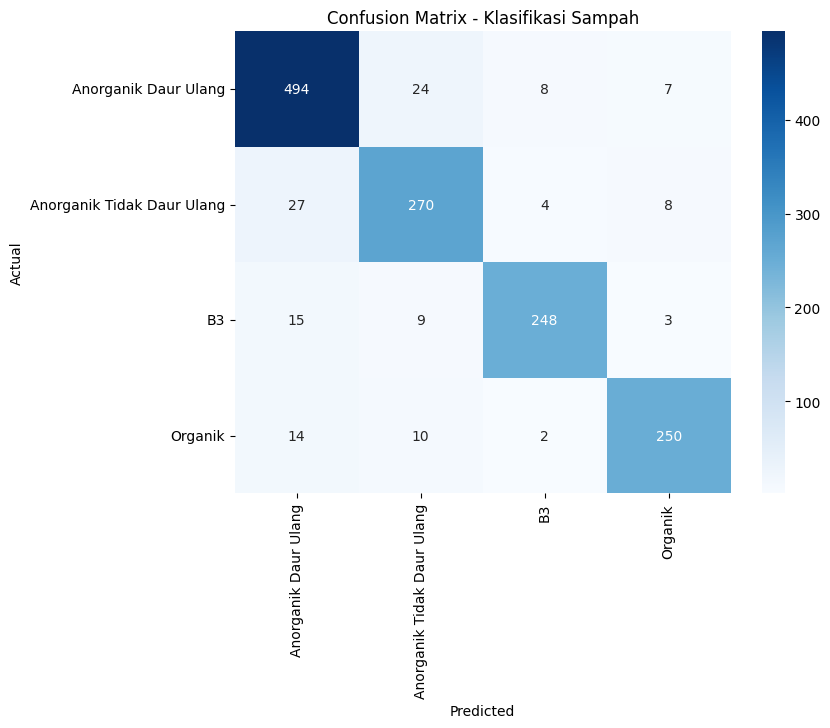

Classification Report:
                            precision    recall  f1-score   support

      Anorganik Daur Ulang       0.90      0.93      0.91       533
Anorganik Tidak Daur Ulang       0.86      0.87      0.87       309
                        B3       0.95      0.90      0.92       275
                   Organik       0.93      0.91      0.92       276

                  accuracy                           0.91      1393
                 macro avg       0.91      0.90      0.91      1393
              weighted avg       0.91      0.91      0.91      1393



In [ ]:
# 1️⃣ Prediksi data test
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2️⃣ Label asli dari generator
y_true = test_generator.classes

# 3️⃣ Nama kelas (urutan sesuai class_indices)
class_names = list(test_generator.class_indices.keys())

# 4️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 5️⃣ Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Klasifikasi Sampah')
plt.show()

# 6️⃣ Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

---
**Insights:**

### 1. Ringkasan Performa Model

- **Akurasi Keseluruhan:**  
  Model mencapai akurasi sebesar 91% pada test set (1393 sample). Ini berarti model secara keseluruhan berhasil mengklasifikasikan dengan benar 91% dari total data yang diuji.

- **Performa per Kelas:**  
  Masing-masing kelas menunjukkan metrik yang sangat baik (precision, recall, dan f1-score berada di kisaran 0.86–0.95). Hal ini menandakan bahwa model melakukan prediksi yang konsisten di semua kategori.

---

### 2. Interpretasi Classification Report

- **Anorganik Daur Ulang:**  
  - Precision: 0.90  
    → Dari semua prediksi sebagai “Anorganik Daur Ulang”, 90% benar-benar termasuk kategori tersebut.  
  - Recall: 0.93  
    → Model berhasil menangkap 93% dari seluruh sample “Anorganik Daur Ulang” yang ada.  
  - F1-score: 0.91  
    → Nilai rata-rata harmonis antara precision dan recall menunjukkan keseimbangan yang sangat baik.

- **Anorganik Tidak Daur Ulang:**  
  - Precision: 0.86  
  - Recall: 0.87  
  - F1-score: 0.87  
    → Meskipun nilai sedikit di bawah kelas lain, performa tetap cukup baik. Namun, nilai ini mengindikasikan bahwa ada sedikit ruang untuk perbaikan dalam mengidentifikasi contoh dari kelas ini.

- **B3:**  
  - Precision: 0.95  
  - Recall: 0.90  
  - F1-score: 0.92  
    → Performa yang sangat tinggi menunjukkan bahwa model sangat andal dalam mengenali sampel kelas “B3”. Precision tinggi berarti sedikit prediksi salah positif, sedangkan recall 90% menunjukkan keberhasilan mendeteksi sebagian besar contoh.

- **Organik:**  
  - Precision: 0.93  
  - Recall: 0.91  
  - F1-score: 0.92  
    → Kinerja untuk kelas “Organik” juga sangat baik dan seimbang, yang menunjukkan bahwa model mampu menangkap karakteristik visual yang mendefinisikan kelas ini.

---

### 3. Analisis Confusion Matrix

- **Struktur Matriks:**  
  Matriks kebingungan (confusion matrix) divisualisasikan dengan heatmap yang membandingkan label aktual (baris) dan prediksi model (kolom) berdasarkan nama kelas.  
  - Setiap angka menunjukkan jumlah contoh untuk kombinasi tertentu dari label aktual dan prediksi.

- **Interpretasi Spesifik:**  
  - **Baris “Anorganik Daur Ulang”:**  
    Mayoritas sample dari kelas ini diprediksi dengan benar (jumlah besar hampir mendekati total support 533), dengan sedikit kesalahan yang mungkin terjadi pada kelas lain.
  
  - **Baris “Anorganik Tidak Daur Ulang”:**  
    Meskipun terdapat beberapa contoh yang salah diklasifikasikan, sebagian besar tetap berada di posisi yang benar, sejalan dengan nilai recall 0.87.
  
  - **Baris “B3” dan “Organik”:**  
    Model dengan sangat akurat memprediksi contoh-contoh dari masing-masing kelas ini, yang konsisten dengan nilai precision dan recall yang tinggi.

- **Manfaat Visualisasi:**  
  Dengan heatmap, kami dapat dengan cepat mengidentifikasi area di mana kesalahan sering terjadi (misalnya, kelas mana yang sering tertukar). Visualisasi ini membantu penelusuran lebih lanjut jika nanti terjadi bias atau misclassification sistematis antara kelas-kelas tertentu.

---

### 4. Implikasi dan Langkah Selanjutnya

- **Keseimbangan Performa:**  
  Nilai macro dan weighted average (sekitar 0.91) menunjukkan bahwa performa model konsisten di semua kelas, yang penting mengingat ada perbedaan jumlah sample antar kelas.
  
- **Potensi Perbaikan:**  
  Walaupun kinerja sudah sangat baik, kelas “Anorganik Tidak Daur Ulang” memiliki sedikit celah (precision dan recall sekitar 0.86–0.87). Ini bisa menjadi fokus di masa mendatang, misalnya dengan:
  - Meningkatkan augmentasi pada kelas ini.
  - Menggunakan teknik penyeimbang (class weighting) jika ketidakseimbangan data atau feature overlap mencurigakan.
  
- **Monitoring Error:**  
  Melihat confusion matrix secara spesifik untuk misclassification antarkelas akan membantu mengidentifikasi apakah ada fitur visual yang perlu disoroti lebih lanjut di tahap preprocessing atau augmentation.

---

Secara keseluruhan, output evaluasi mengindikasikan bahwa model telah belajar dengan baik untuk mengklasifikasikan gambar sampah ke dalam 4 kelas. Metrik tinggi di semua kategori, ditambah evaluasi visual melalui confusion matrix, menjadikan model ini andal untuk deployment lebih lanjut pada aplikasi berbasis identifikasi sampah.

---

## **Inferensi**

### **Unggah File ke Colab**

Pada tahap ini, kami memanfaatkan modul `files` dari `google.colab` untuk mengunggah file secara manual dari komputer lokal ke lingkungan Colab. Fungsi `files.upload()` akan memunculkan dialog untuk memilih file, dan file yang diunggah akan disimpan dalam sebuah dictionary dengan nama file sebagai key dan isinya (dalam bentuk bytes) sebagai value. Langkah ini sangat berguna ketika dataset atau file konfigurasi tidak tersedia secara langsung di Google Drive dan perlu diunggah secara instan ke runtime.

---

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving sedotan_plastik195.png to sedotan_plastik195.png


### **Fungsi Prediksi Gambar**

Pada tahap ini, kami mendefinisikan fungsi `predict_image(img_path)` untuk melakukan inferensi pada sebuah gambar baru. Fungsi ini akan:

1. **Muat dan Preprocess Gambar:**  
   Gambar di-load menggunakan `image.load_img()` dengan ukuran target (224, 224) agar sesuai dengan input model. Kemudian, gambar diubah ke format array menggunakan `image.img_to_array()`, dinormalisasi (nilai pixel dibagi 255) agar berada pada rentang [0,1], dan diperluas dimensinya agar berbentuk satu batch (dimensi batch ditambahkan dengan `np.expand_dims()`).

2. **Prediksi:**  
   Menggunakan model yang sudah dilatih, fungsi memprediksi probabilitas tiap kelas dari gambar yang telah di-preprocess. Fungsi `np.argmax()` digunakan untuk mendapatkan indeks kelas prediksi dengan nilai tertinggi, lalu indeks tersebut diterjemahkan ke nama kelas menggunakan dictionary `label_map`.

3. **Visualisasi dan Output:**  
   Gambar asli ditampilkan dengan menggunakan Matplotlib (`plt.imshow()`) beserta judul yang menunjukkan kelas prediksi. Fungsi kemudian mengembalikan label kelas yang telah diprediksi.

**Penjelasan Detail:**

- **Preprocessing Gambar:**  
  Penggunaan `image.load_img()` dengan parameter `target_size` memastikan gambar diresize ke dimensi 224x224, yang merupakan ukuran input standar dari model (VGG16). Langkah normalisasi (`img_array / 255.0`) juga penting agar model menerima input dengan nilai pixel yang telah terstandardisasi seperti saat training.

- **Prediksi dan Ekstraksi Label:**  
  Model melakukan inferensi dan menghasilkan probabilitas untuk setiap kelas. `np.argmax()` mengembalikan indeks dari kelas yang memiliki probabilitas tertinggi. Dictionary `label_map` kemudian digunakan untuk menerjemahkan indeks tersebut ke nama kelas aslinya.

- **Visualisasi dengan Matplotlib:**  
  Setelah prediksi, gambar asli ditampilkan bersama label prediksi dalam judul. Langkah ini membantu dalam verifikasi visual terhadap hasil prediksi.

Fungsi ini dapat digunakan secara langsung untuk memprediksi gambar baru selama telah tersedia model yang sudah dilatih serta dictionary `label_map` yang memetakan indeks ke label kelas.

---

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    # Muat gambar dan ubah ukuran
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi sesuai data training
    img_array = np.expand_dims(img_array, axis=0)  # Tambah batch dimension

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_label = label_map[predicted_class]

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {class_label}")
    plt.show()

    return class_label


Fungsi `predict_image` akan memuat, memproses, dan melakukan prediksi pada gambar "sedotan_plastik195.png". Fungsi ini akan:

- Resize gambar ke 224×224,
- Melakukan normalisasi agar nilai pixel berada di [0, 1],
- Menambahkan dimensi batch,
- Menggunakan model untuk memprediksi label,
- Menampilkan gambar serta judul yang berisikan nama kelas prediksi.

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


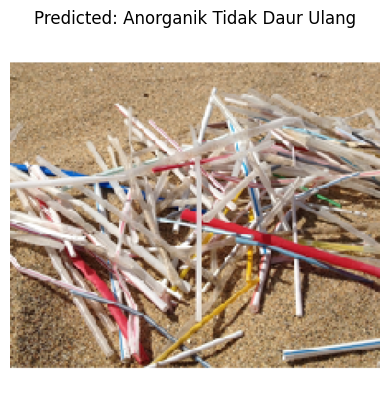

'Anorganik Tidak Daur Ulang'

In [ ]:
predict_image("sedotan_plastik195.png")